# Processing Data

In [1]:
import pandas as pd
import os
from glob import glob

# Uploading CSV
data_entries = pd.read_csv('/kaggle/input/data/Data_Entry_2017.csv')
data_entries = data_entries.drop(columns=['Unnamed: 11', 'Patient Gender', 'Patient Age', 'View Position', 'Follow-up #', 'OriginalImagePixelSpacing[x', 'y]','OriginalImage[Width', 'Height]'])

# Setting image paths in dataframe

image_paths = {os.path.basename(x): x for x in glob('../input/data/images*/images/*.png')}
data_entries['path'] = data_entries['Image Index'].map(image_paths.get)
data_entries

Image Index          Finding Labels  Patient ID  \
0       00000001_000.png            Cardiomegaly           1   
1       00000001_001.png  Cardiomegaly|Emphysema           1   
2       00000001_002.png   Cardiomegaly|Effusion           1   
3       00000002_000.png              No Finding           2   
4       00000003_000.png                  Hernia           3   
...                  ...                     ...         ...   
112115  00030801_001.png          Mass|Pneumonia       30801   
112116  00030802_000.png              No Finding       30802   
112117  00030803_000.png              No Finding       30803   
112118  00030804_000.png              No Finding       30804   
112119  00030805_000.png              No Finding       30805   

                                                    path  
0       ../input/data/images_001/images/00000001_000.png  
1       ../input/data/images_001/images/00000001_001.png  
2       ../input/data/images_001/images/00000001_002.png  
3       ../input/data/images_001/images/00000002_000.png  
4       ../input/data/images_001/images/00000003_000.png  
...                                                  ...  
112115  ../input/data/images_012/images/00030801_001.png  
112116  ../input/data/images_012/images/00030802_000.png  
112117  ../input/data/images_012/images/00030803_000.png  
112118  ../input/data/images_012/images/00030804_000.png  
112119  ../input/data/images_012/images/00030805_000.png  

[112120 rows x 4 columns]

# Cleaning Data

In [2]:
# Simplifying findings column
def common_findings(findings):
    findings_list = findings.split('|')
    for i, val in enumerate(findings_list):
        if val == 'Nodule':
            findings_list[i] = 'Mass'
        elif val == 'Infiltration' or val == 'Pneumonia':
            findings_list[i] = 'Consolidation'
    findings_list = list(set(findings_list))
    final_findings = ''
    for finding in findings_list:
        final_findings += finding + '|'
    if final_findings[-1] == '|':
        final_findings = final_findings[:-1]
    return final_findings

data_entries['Finding Labels'] = data_entries['Finding Labels'].apply(common_findings)

# Columns for each finding
new_col_names = ['Mass', 'Consolidation', 'Atelectasis', 'Pneumothorax', 'Edema', 'Emphysema', 'Fibrosis', 'Effusion', 'Pleural_Thickening', 'Cardiomegaly', 'Hernia']
for name in new_col_names:
    data_entries[name] = data_entries['Finding Labels'].map(lambda result: 1.0 if name in result else 0)

data_entries

Image Index          Finding Labels  Patient ID  \
0       00000001_000.png            Cardiomegaly           1   
1       00000001_001.png  Cardiomegaly|Emphysema           1   
2       00000001_002.png   Cardiomegaly|Effusion           1   
3       00000002_000.png              No Finding           2   
4       00000003_000.png                  Hernia           3   
...                  ...                     ...         ...   
112115  00030801_001.png      Mass|Consolidation       30801   
112116  00030802_000.png              No Finding       30802   
112117  00030803_000.png              No Finding       30803   
112118  00030804_000.png              No Finding       30804   
112119  00030805_000.png              No Finding       30805   

                                                    path  Mass  Consolidation  \
0       ../input/data/images_001/images/00000001_000.png   0.0            0.0   
1       ../input/data/images_001/images/00000001_001.png   0.0            0.0   
2       ../input/data/images_001/images/00000001_002.png   0.0            0.0   
3       ../input/data/images_001/images/00000002_000.png   0.0            0.0   
4       ../input/data/images_001/images/00000003_000.png   0.0            0.0   
...                                                  ...   ...            ...   
112115  ../input/data/images_012/images/00030801_001.png   1.0            1.0   
112116  ../input/data/images_012/images/00030802_000.png   0.0            0.0   
112117  ../input/data/images_012/images/00030803_000.png   0.0            0.0   
112118  ../input/data/images_012/images/00030804_000.png   0.0            0.0   
112119  ../input/data/images_012/images/00030805_000.png   0.0            0.0   

        Atelectasis  Pneumothorax  Edema  Emphysema  Fibrosis  Effusion  \
0               0.0           0.0    0.0        0.0       0.0       0.0   
1               0.0           0.0    0.0        1.0       0.0       0.0   
2               0.0           0.0    0.0        0.0       0.0       1.0   
3               0.0           0.0    0.0        0.0       0.0       0.0   
4               0.0           0.0    0.0        0.0       0.0       0.0   
...             ...           ...    ...        ...       ...       ...   
112115          0.0           0.0    0.0        0.0       0.0       0.0   
112116          0.0           0.0    0.0        0.0       0.0       0.0   
112117          0.0           0.0    0.0        0.0       0.0       0.0   
112118          0.0           0.0    0.0        0.0       0.0       0.0   
112119          0.0           0.0    0.0        0.0       0.0       0.0   

        Pleural_Thickening  Cardiomegaly  Hernia  
0                      0.0           1.0     0.0  
1                      0.0           1.0     0.0  
2                      0.0           1.0     0.0  
3                      0.0           0.0     0.0  
4                      0.0           0.0     1.0  
...                    ...           ...     ...  
112115                 0.0           0.0     0.0  
112116                 0.0           0.0     0.0  
112117                 0.0           0.0     0.0  
112118                 0.0           0.0     0.0  
112119                 0.0           0.0     0.0  

[112120 rows x 15 columns]

No findings: 60361


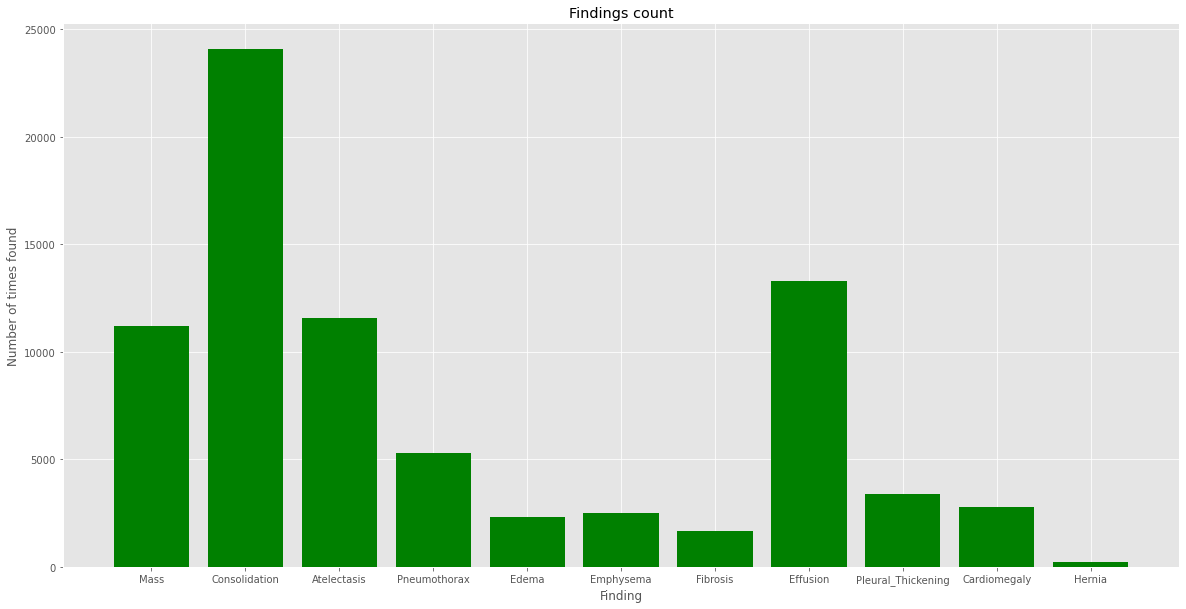

[11207, 24084, 11559, 5302, 2303, 2516, 1686, 13317, 3385, 2776, 227]


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20,10)

# Checking for data imbalance
x = ['Mass', 'Consolidation', 'Atelectasis', 'Pneumothorax', 'Edema', 'Emphysema', 'Fibrosis', 'Effusion', 'Pleural_Thickening', 'Cardiomegaly', 'Hernia']
findings_count = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
x_pos = [i for i, _ in enumerate(x)]

def count_findings(findings):
    findings_list = findings.split('|')
    for finding in findings_list:
        for i in range(0, len(x)):
            if finding == x[i]:
                findings_count[i] += 1
                break

data_entries['Finding Labels'].apply(count_findings)

no_findings = [0]
def count_no_findings(findings):
    findings_list = findings.split('|')
    if len(findings_list) == 1 and findings_list[0] == 'No Finding':
        no_findings[0] += 1

data_entries['Finding Labels'].apply(count_no_findings)
print('No findings: ' + str(no_findings[0]))
        
plt.bar(x_pos, findings_count, color='green')
plt.xlabel('Finding')
plt.ylabel('Number of times found')
plt.title('Findings count')
plt.xticks(x_pos, x)
plt.show()
print(findings_count)

# Undersampling

In [4]:
import numpy as np

to_remove_no_finding = np.random.choice(data_entries[data_entries['Finding Labels']=='No Finding'].index, size=60361, replace=False)
sample_no_finding = data_entries.drop(to_remove_no_finding)

to_remove_consolidation = np.random.choice(sample_no_finding[sample_no_finding['Finding Labels'].str.contains('Consolidation', regex=False)].index, size=19000, replace=False)
sample_consolidation = sample_no_finding.drop(to_remove_consolidation)

to_remove_mass = np.random.choice(sample_consolidation[sample_consolidation['Finding Labels'].str.contains('Mass', regex=False)].index, size=4000, replace=False)
sample_mass = sample_consolidation.drop(to_remove_mass)

to_remove_atelectasis = np.random.choice(sample_mass[sample_mass['Finding Labels'].str.contains('Atelectasis', regex=False)].index, size=3300, replace=False)
sample_atelectasis = sample_mass.drop(to_remove_atelectasis)

to_remove_effusion = np.random.choice(sample_atelectasis[sample_atelectasis['Finding Labels'].str.contains('Effusion', regex=False)].index, size=4000, replace=False)
sample_effusion = sample_atelectasis.drop(to_remove_effusion)

df = sample_effusion
df

Image Index                                Finding Labels  \
0       00000001_000.png                                  Cardiomegaly   
1       00000001_001.png                        Cardiomegaly|Emphysema   
2       00000001_002.png                         Cardiomegaly|Effusion   
4       00000003_000.png                                        Hernia   
5       00000003_001.png                                        Hernia   
...                  ...                                           ...   
112091  00030786_001.png               Effusion|Emphysema|Pneumothorax   
112094  00030786_004.png  Cardiomegaly|Effusion|Emphysema|Pneumothorax   
112100  00030789_000.png                                 Consolidation   
112106  00030793_000.png                                          Mass   
112108  00030795_000.png                            Pleural_Thickening   

        Patient ID                                              path  Mass  \
0                1  ../input/data/images_001/images/00000001_000.png   0.0   
1                1  ../input/data/images_001/images/00000001_001.png   0.0   
2                1  ../input/data/images_001/images/00000001_002.png   0.0   
4                3  ../input/data/images_001/images/00000003_000.png   0.0   
5                3  ../input/data/images_001/images/00000003_001.png   0.0   
...            ...                                               ...   ...   
112091       30786  ../input/data/images_012/images/00030786_001.png   0.0   
112094       30786  ../input/data/images_012/images/00030786_004.png   0.0   
112100       30789  ../input/data/images_012/images/00030789_000.png   0.0   
112106       30793  ../input/data/images_012/images/00030793_000.png   1.0   
112108       30795  ../input/data/images_012/images/00030795_000.png   0.0   

        Consolidation  Atelectasis  Pneumothorax  Edema  Emphysema  Fibrosis  \
0                 0.0          0.0           0.0    0.0        0.0       0.0   
1                 0.0          0.0           0.0    0.0        1.0       0.0   
2                 0.0          0.0           0.0    0.0        0.0       0.0   
4                 0.0          0.0           0.0    0.0        0.0       0.0   
5                 0.0          0.0           0.0    0.0        0.0       0.0   
...               ...          ...           ...    ...        ...       ...   
112091            0.0          0.0           1.0    0.0        1.0       0.0   
112094            0.0          0.0           1.0    0.0        1.0       0.0   
112100            1.0          0.0           0.0    0.0        0.0       0.0   
112106            0.0          0.0           0.0    0.0        0.0       0.0   
112108            0.0          0.0           0.0    0.0        0.0       0.0   

        Effusion  Pleural_Thickening  Cardiomegaly  Hernia  
0            0.0                 0.0           1.0     0.0  
1            0.0                 0.0           1.0     0.0  
2            1.0                 0.0           1.0     0.0  
4            0.0                 0.0           0.0     1.0  
5            0.0                 0.0           0.0     1.0  
...          ...                 ...           ...     ...  
112091       1.0                 0.0           0.0     0.0  
112094       1.0                 0.0           1.0     0.0  
112100       0.0                 0.0           0.0     0.0  
112106       0.0                 0.0           0.0     0.0  
112108       0.0                 1.0           0.0     0.0  

[21459 rows x 15 columns]

# Checking sample distribution

No findings: 0


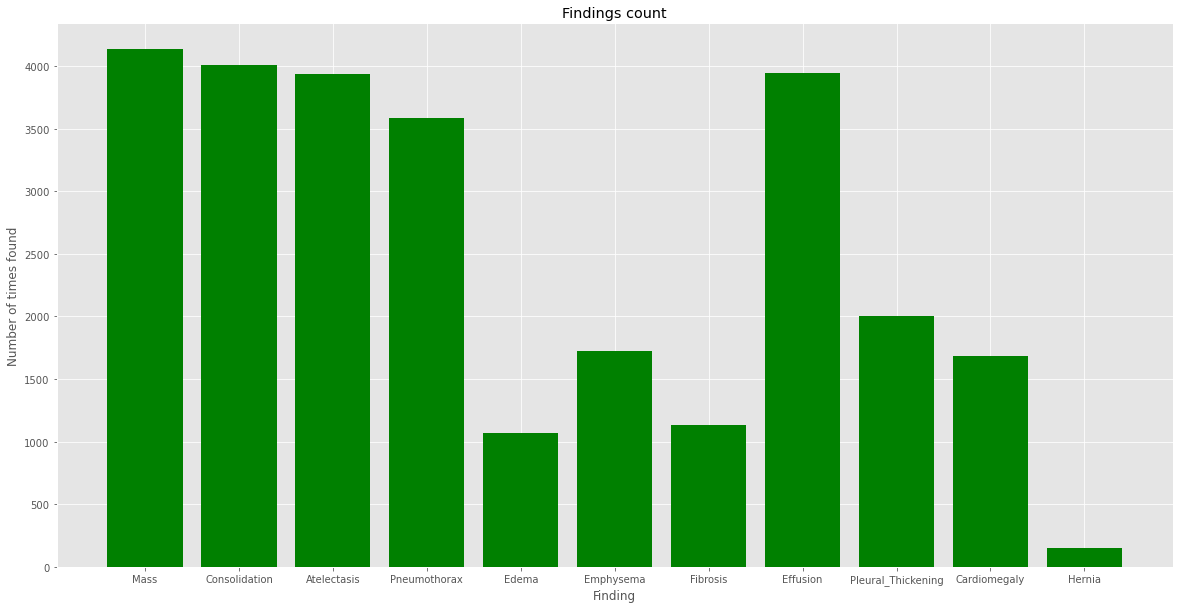

[4135, 4008, 3938, 3583, 1067, 1727, 1135, 3944, 2003, 1683, 152]


In [5]:
findings_count = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
df['Finding Labels'].apply(count_findings)
no_findings = [0]
df['Finding Labels'].apply(count_no_findings)
print('No findings: ' + str(no_findings[0]))
plt.bar(x_pos, findings_count, color='green')
plt.xlabel('Finding')
plt.ylabel('Number of times found')
plt.title('Findings count')
plt.xticks(x_pos, x)
plt.show()
print(findings_count)

# Creating sets

In [6]:
from sklearn.model_selection import train_test_split

train_and_val_set, test_set = train_test_split(df, train_size=0.8, test_size=0.2, random_state=1111)

print('train and val set size: ' + str(len(train_and_val_set)))
print('test set size: ' + str(len(test_set)))

train and val set size: 17167
test set size: 4292


# Generators

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# Image pre-processing
data_generator = ImageDataGenerator(
        rescale=1./255,
        horizontal_flip=False,
        validation_split=0.25)

# Creating generators
image_size = (256,256)
col_names = ['Mass', 'Consolidation', 'Atelectasis', 'Pneumothorax', 'Edema', 'Emphysema', 'Fibrosis', 'Effusion', 'Pleural_Thickening', 'Cardiomegaly', 'Hernia']

train_gen = data_generator.flow_from_dataframe(
    dataframe=train_and_val_set,
    directory=None,
    x_col='path',
    y_col=col_names,
    target_size=image_size,
    color_mode='grayscale',
    class_mode='raw',
    batch_size=64,
    subset='training',
    validate_filenames=False
)

val_gen = data_generator.flow_from_dataframe(
    dataframe=train_and_val_set,
    directory=None,
    x_col='path',
    y_col=col_names,
    target_size=image_size,
    color_mode='grayscale',
    class_mode='raw',
    batch_size=64,
    subset='validation',
    validate_filenames=False
)

test_gen = data_generator.flow_from_dataframe(
    dataframe=test_set,
    directory=None,
    x_col='path',
    y_col=col_names,
    target_size=image_size,
    color_mode='grayscale',
    class_mode='raw',
    batch_size=64,
    validate_filenames=False
)

Found 12876 non-validated image filenames.
Found 4291 non-validated image filenames.
Found 4292 non-validated image filenames.


In [ ]:
def compute_class_freqs(labels):
    N = labels.shape[0]
    positive_frequencies = (labels.sum(axis = 0))/N
    negative_frequencies = 1.0 - positive_frequencies
    
    return positive_frequencies, negative_frequencies

freq_pos, freq_neg = compute_class_freqs(train_gen.labels)
print(freq_pos)
print(freq_neg)

In [ ]:
import tensorflow.keras.backend as K

def get_weighted_loss(pos_weights, neg_weights, epsilon=1e-7):
    def weighted_loss(y_true, y_pred):
        loss = 0.0
        for i in range(len(pos_weights)):
            loss_pos = -1 * K.mean(pos_weights[i] * y_true[:, i] * K.log(y_pred[:, i] + epsilon))
            loss_neg = -1 * K.mean(neg_weights[i] * (1 - y_true[:, i]) * K.log(1 - y_pred[:, i] + epsilon))
            loss += (loss_pos + loss_neg)
        return loss

    return weighted_loss

# Model

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Dense, Activation, Conv2D, Flatten, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import FalseNegatives
from tensorflow.keras.utils import plot_model

model = Sequential()

# Input Layer
# First convolutional layer
model.add(Conv2D(filters=96, input_shape=(256,256,1), kernel_size=(11, 11), strides=(4, 4), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='valid'))
model.add(BatchNormalization())
# model.add(Dropout(0.2))

# Second convolutional layer
model.add(Conv2D(filters=256, kernel_size=(11, 11), strides=(1, 1), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='valid'))
model.add(BatchNormalization())

# Third layer
model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu'))
model.add(BatchNormalization())

# Fourth layer
model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu'))
model.add(BatchNormalization())

# Fifth layer
model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='valid'))
model.add(BatchNormalization())

# Fully connected layers
model.add(Flatten())
model.add(Dense(4096, activation = 'relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(1000, activation = 'relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(11, activation = 'sigmoid'))

model.summary()
plot_model(model, to_file='./model_plot.png', show_shapes=True, show_layer_names=True)

# Fitting the Model

In [ ]:
# model = tf.keras.models.load_model('./model10epoch',
#                                    custom_objects={ 'loss': get_weighted_loss(freq_neg, freq_pos) },
#                                    compile=False)

adam = Adam(learning_rate=0.01)
model.compile(optimizer=adam,
              loss=get_weighted_loss(freq_neg, freq_pos),
              metrics=['binary_accuracy', 'accuracy', FalseNegatives()],
              run_eagerly=True)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.hdf5',
                             monitor='acc',
                             verbose=1,
                             save_best_only=True,
                             mode='auto',
                             period=1)

model.fit(train_gen,
          steps_per_epoch=200,
          validation_data=val_gen,
          validation_steps=50,
          verbose=1,
          epochs=30,
          use_multiprocessing=True,
          callbacks=[checkpoint])

In [ ]:
model.save("model30epoch.h5")
# model = load_model('model30epoch.h5')

# Evaluating accuracy

In [ ]:
results = model.evaluate(test_gen, verbose=1, steps=50)

# Visualizing Layer Outputs

In [ ]:
!pip install keract

Generator to retrieve 1 image from testing set

In [ ]:
test_gen_single = data_generator.flow_from_dataframe(
    dataframe=test_set,
    directory=None,
    x_col='path',
    y_col=col_names,
    target_size=image_size,
    color_mode='grayscale',
    class_mode='raw',
    batch_size=1,
    validate_filenames=False
)

In [ ]:
import keract
from keract import get_activations, display_activations

keract_inputs = test_gen_single.next()[0]
activations = get_activations(model, keract_inputs)
display_activations(activations, cmap="gray", save=False)

In [ ]:
input_arr = keract_inputs
predictions = model.predict(input_arr)
prediction_word = predictions[0].tolist()

for x, y in enumerate(prediction_word):
    if y > .5:
        print(new_col_names[x])

for x, y in enumerate(prediction_word):
    print(new_col_names[x] + ' ' + str(y))
    
print(data_entries.loc[data_entries['path']==image_path])

In [ ]:
from keract import display_heatmaps
display_heatmaps(activations, keract_inputs, save=False)

In [8]:
from keract import display_heatmaps
display_heatmaps(activations, keract_inputs, save=False)

[0.19478099 0.18313141 0.1805685  0.16837527 0.04954955 0.08038211
 0.05351041 0.18460702 0.09226468 0.08053743 0.00722274]
[0.80521901 0.81686859 0.8194315  0.83162473 0.95045045 0.91961789
 0.94648959 0.81539298 0.90773532 0.91946257 0.99277726]


In [9]:
import tensorflow.keras.backend as K

def get_weighted_loss(pos_weights, neg_weights, epsilon=1e-7):
    def weighted_loss(y_true, y_pred):
        loss = 0.0
        for i in range(len(pos_weights)):
            loss_pos = -1 * K.mean(pos_weights[i] * y_true[:, i] * K.log(y_pred[:, i] + epsilon))
            loss_neg = -1 * K.mean(neg_weights[i] * (1 - y_true[:, i]) * K.log(1 - y_pred[:, i] + epsilon))
            loss += (loss_pos + loss_neg)
        return loss

    return weighted_loss

# Model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 62, 62, 96)        11712     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 96)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 31, 31, 96)        384       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 21, 21, 256)       2973952   
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 256)       0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 10, 10, 256)       1024      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 384)        

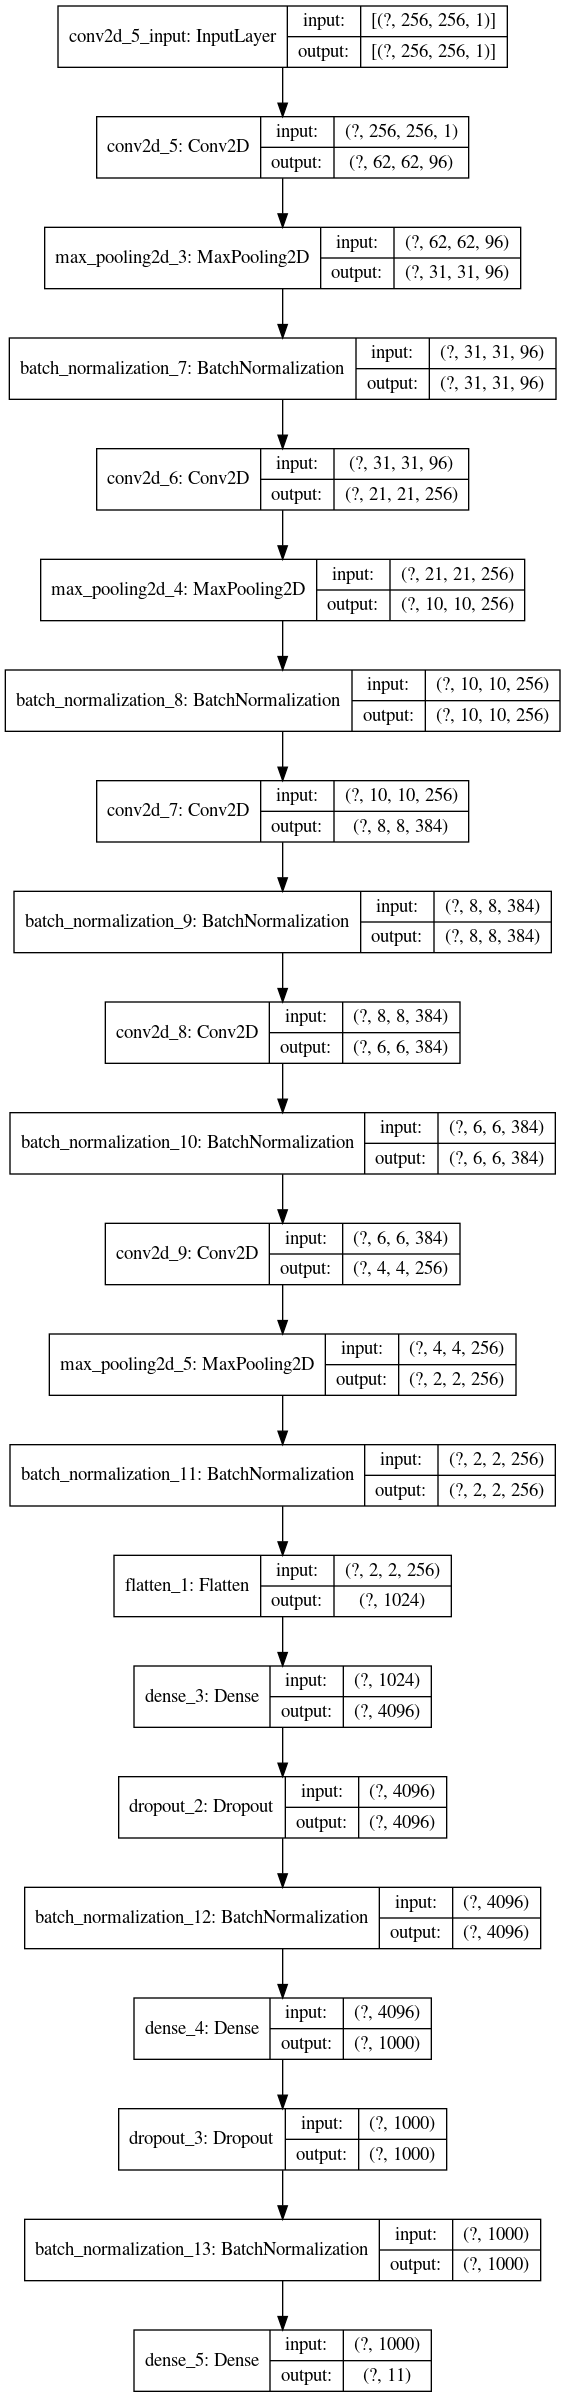

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Dense, Activation, Conv2D, Flatten, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import FalseNegatives
from tensorflow.keras.utils import plot_model

model = Sequential()

# Input Layer
# First convolutional layer
model.add(Conv2D(filters=96, input_shape=(256,256,1), kernel_size=(11, 11), strides=(4, 4), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='valid'))
model.add(BatchNormalization())
# model.add(Dropout(0.2))

# Second convolutional layer
model.add(Conv2D(filters=256, kernel_size=(11, 11), strides=(1, 1), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='valid'))
model.add(BatchNormalization())

# Third layer
model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu'))
model.add(BatchNormalization())

# Fourth layer
model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu'))
model.add(BatchNormalization())

# Fifth layer
model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='valid'))
model.add(BatchNormalization())

# Fully connected layers
model.add(Flatten())
model.add(Dense(4096, activation = 'relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(1000, activation = 'relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(11, activation = 'sigmoid'))

model.summary()
plot_model(model, to_file='./model_plot.png', show_shapes=True, show_layer_names=True)

# Fitting the Model

In [12]:
# model = tf.keras.models.load_model('./model10epoch',
#                                    custom_objects={ 'loss': get_weighted_loss(freq_neg, freq_pos) },
#                                    compile=False)

adam = Adam(learning_rate=0.01)
model.compile(optimizer=adam,
              loss=get_weighted_loss(freq_neg, freq_pos),
              metrics=['binary_accuracy', 'accuracy', FalseNegatives()],
              run_eagerly=True)

In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.hdf5',
                             monitor='acc',
                             verbose=1,
                             save_best_only=True,
                             mode='auto',
                             period=1)

model.fit(train_gen,
          steps_per_epoch=200,
          validation_data=val_gen,
          validation_steps=50,
          verbose=1,
          epochs=30,
          use_multiprocessing=True,
          callbacks=[checkpoint])

Epoch 1/30
200/200 [==============================] - 480s 2s/step - loss: 1.8808 - binary_accuracy: 0.5389 - accuracy: 0.0857 - false_negatives: 7566.0000 - val_loss: 6.1169 - val_binary_accuracy: 0.5851 - val_accuracy: 0.0825 - val_false_negatives: 2390.0000
Epoch 2/30
200/200 [==============================] - 292s 1s/step - loss: 1.6258 - binary_accuracy: 0.5548 - accuracy: 0.0994 - false_negatives: 7186.0000 - val_loss: 1.5575 - val_binary_accuracy: 0.5335 - val_accuracy: 0.0909 - val_false_negatives: 1581.0000
Epoch 3/30
200/200 [==============================] - 287s 1s/step - loss: 1.4825 - binary_accuracy: 0.5847 - accuracy: 0.1177 - false_negatives: 6531.0000 - val_loss: 1.4837 - val_binary_accuracy: 0.6476 - val_accuracy: 0.1625 - val_false_negatives: 1833.0000
Epoch 4/30
200/200 [==============================] - 285s 1s/step - loss: 1.4253 - binary_accuracy: 0.6013 - accuracy: 0.1424 - false_negatives: 6150.0000 - val_loss: 1.6171 - val_binary_accuracy: 0.6172 - val_accura

In [17]:
model.save("model30epoch.h5")
# model = load_model('model30epoch.h5')

# Evaluating accuracy

In [19]:
results = model.evaluate(test_gen, verbose=1, steps=50)

50/50 [==============================] - 84s 2s/step - loss: 1.5301 - binary_accuracy: 0.5898 - accuracy: 0.1762 - false_negatives: 1567.0000


# Visualizing Layer Outputs

In [23]:
!pip install keract

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


Generator to retrieve 1 image from testing set

In [24]:
test_gen_single = data_generator.flow_from_dataframe(
    dataframe=test_set,
    directory=None,
    x_col='path',
    y_col=col_names,
    target_size=image_size,
    color_mode='grayscale',
    class_mode='raw',
    batch_size=1,
    validate_filenames=False
)

Found 4292 non-validated image filenames.


conv2d_5_input (1, 256, 256, 1) 


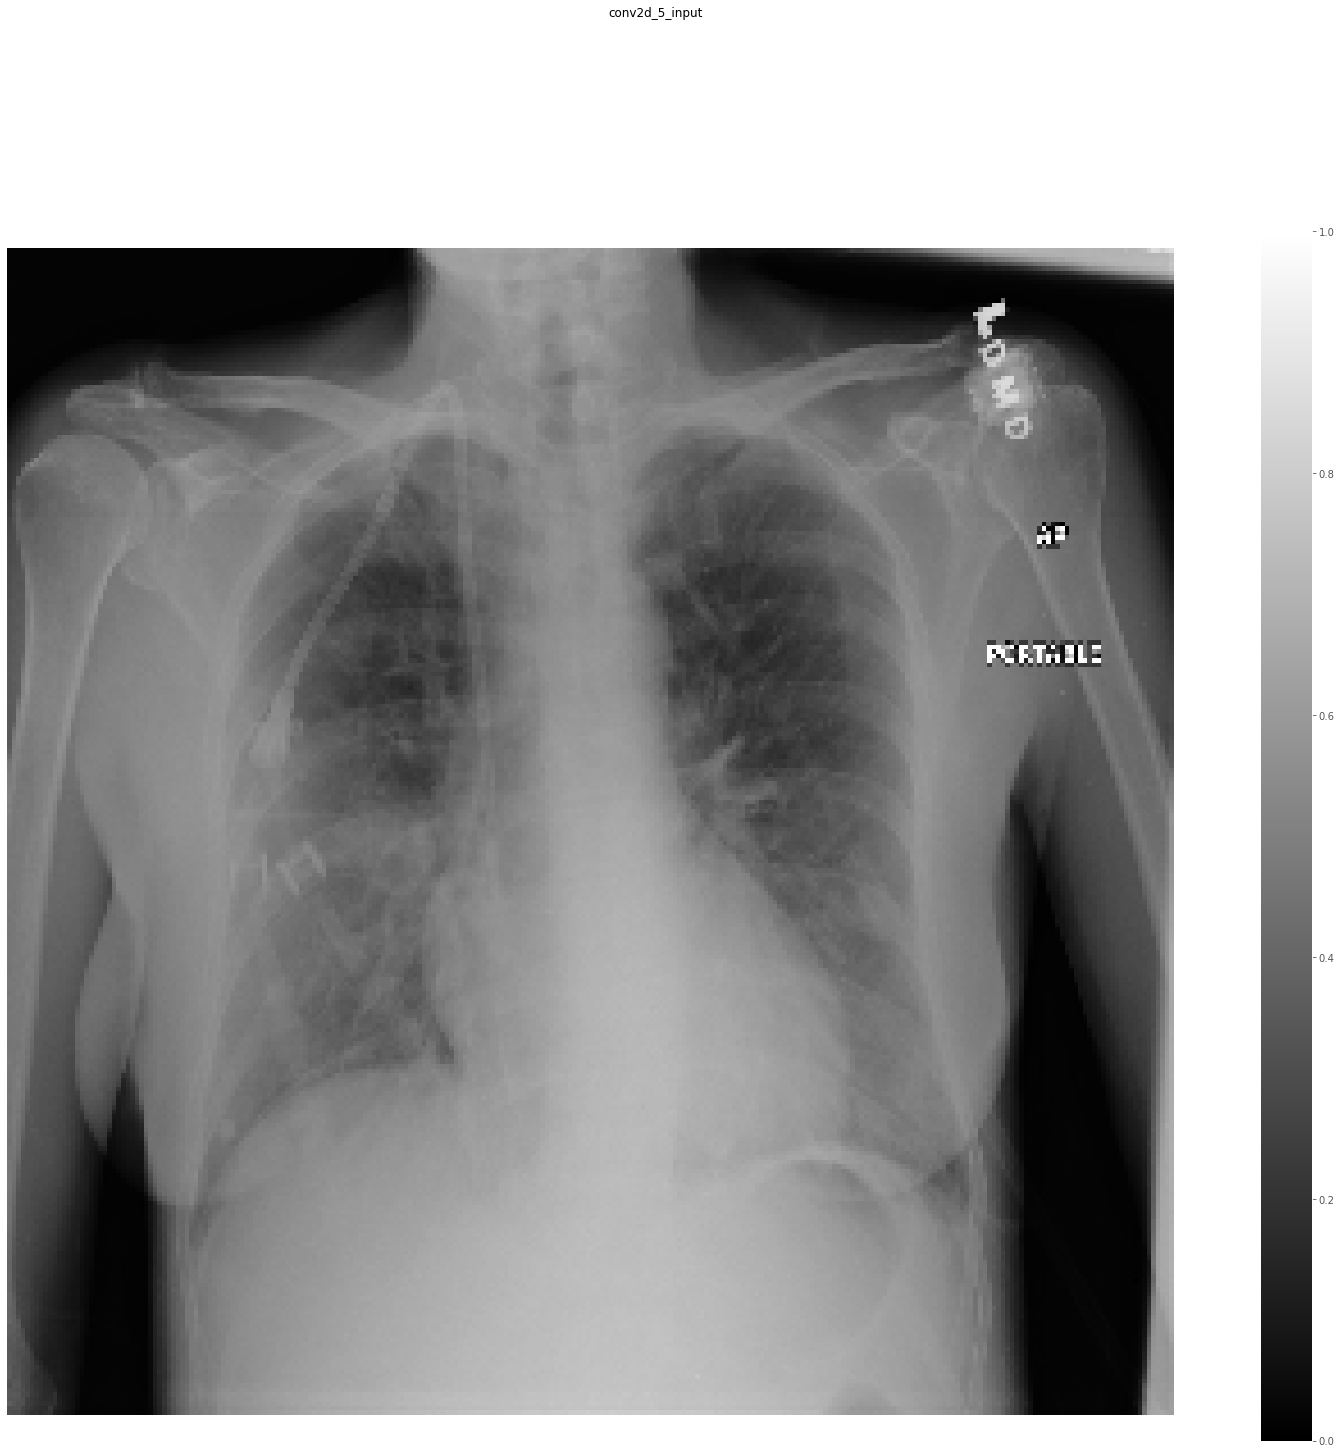

conv2d_5 (1, 62, 62, 96) 


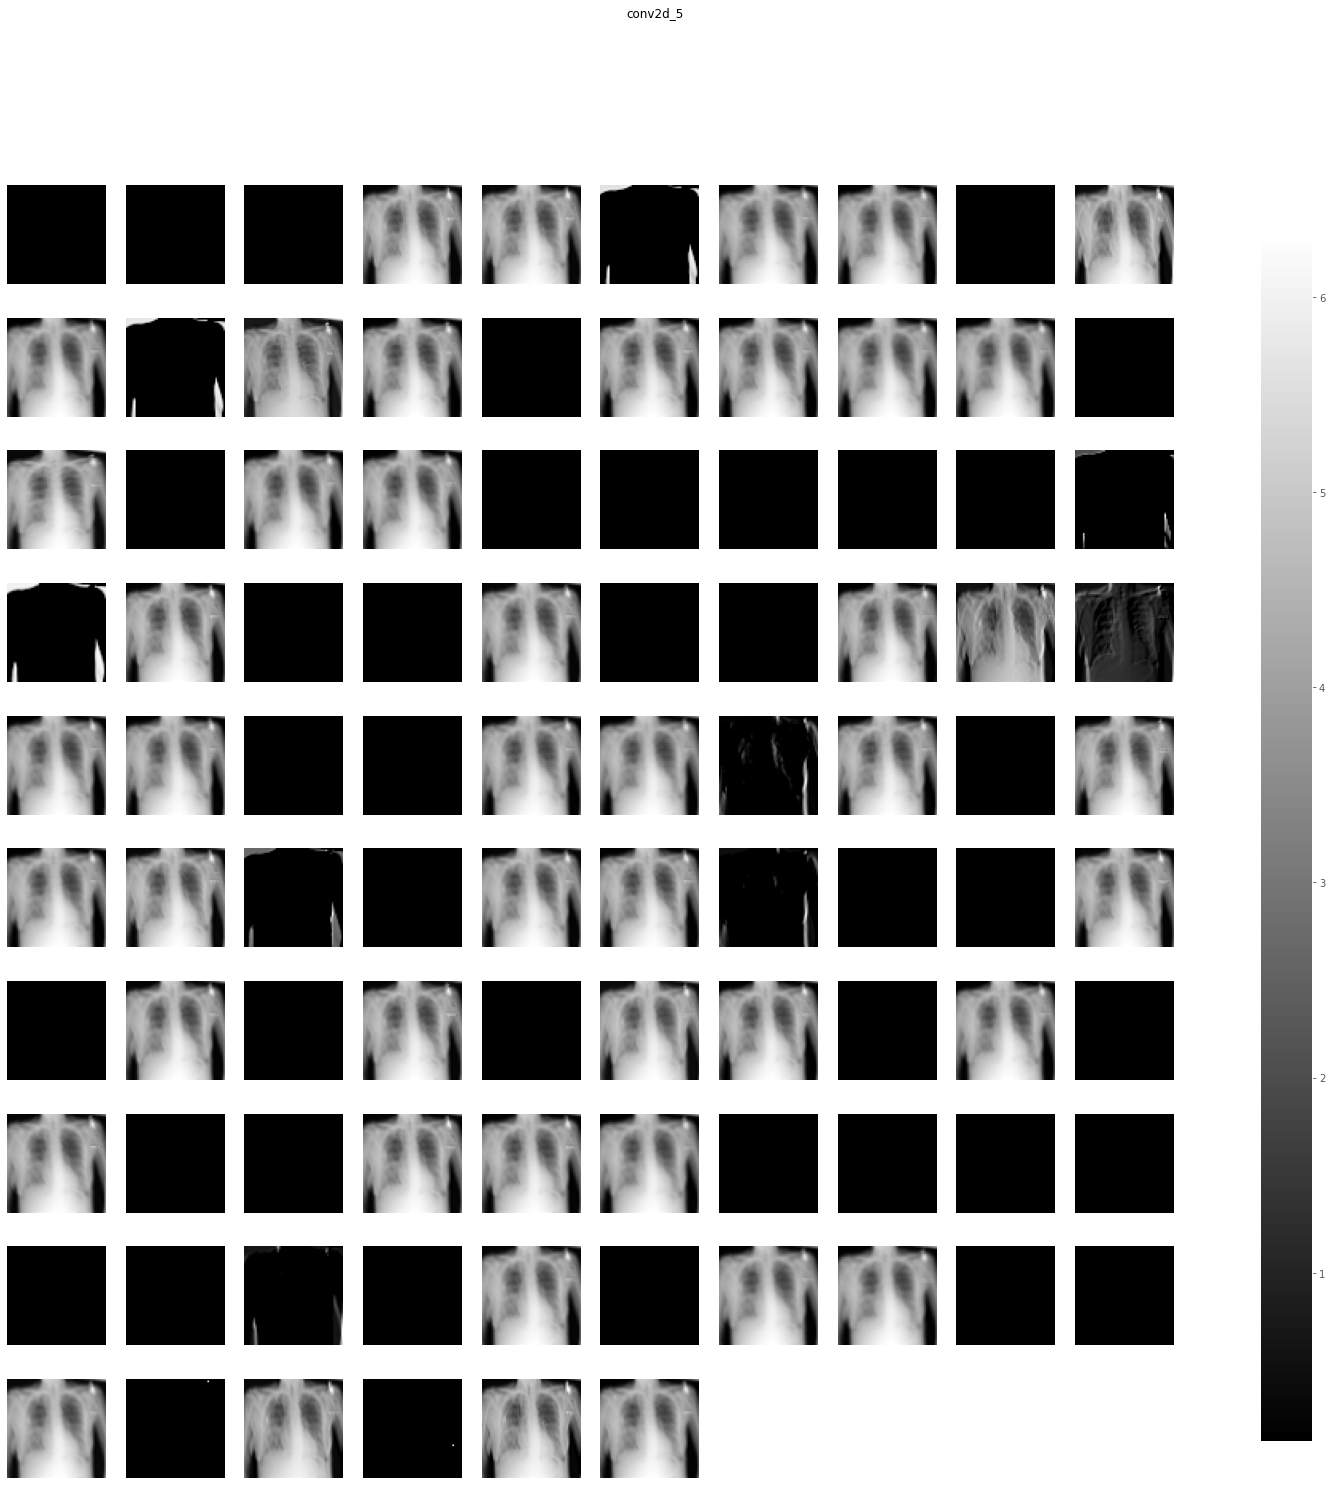

max_pooling2d_3 (1, 31, 31, 96) 


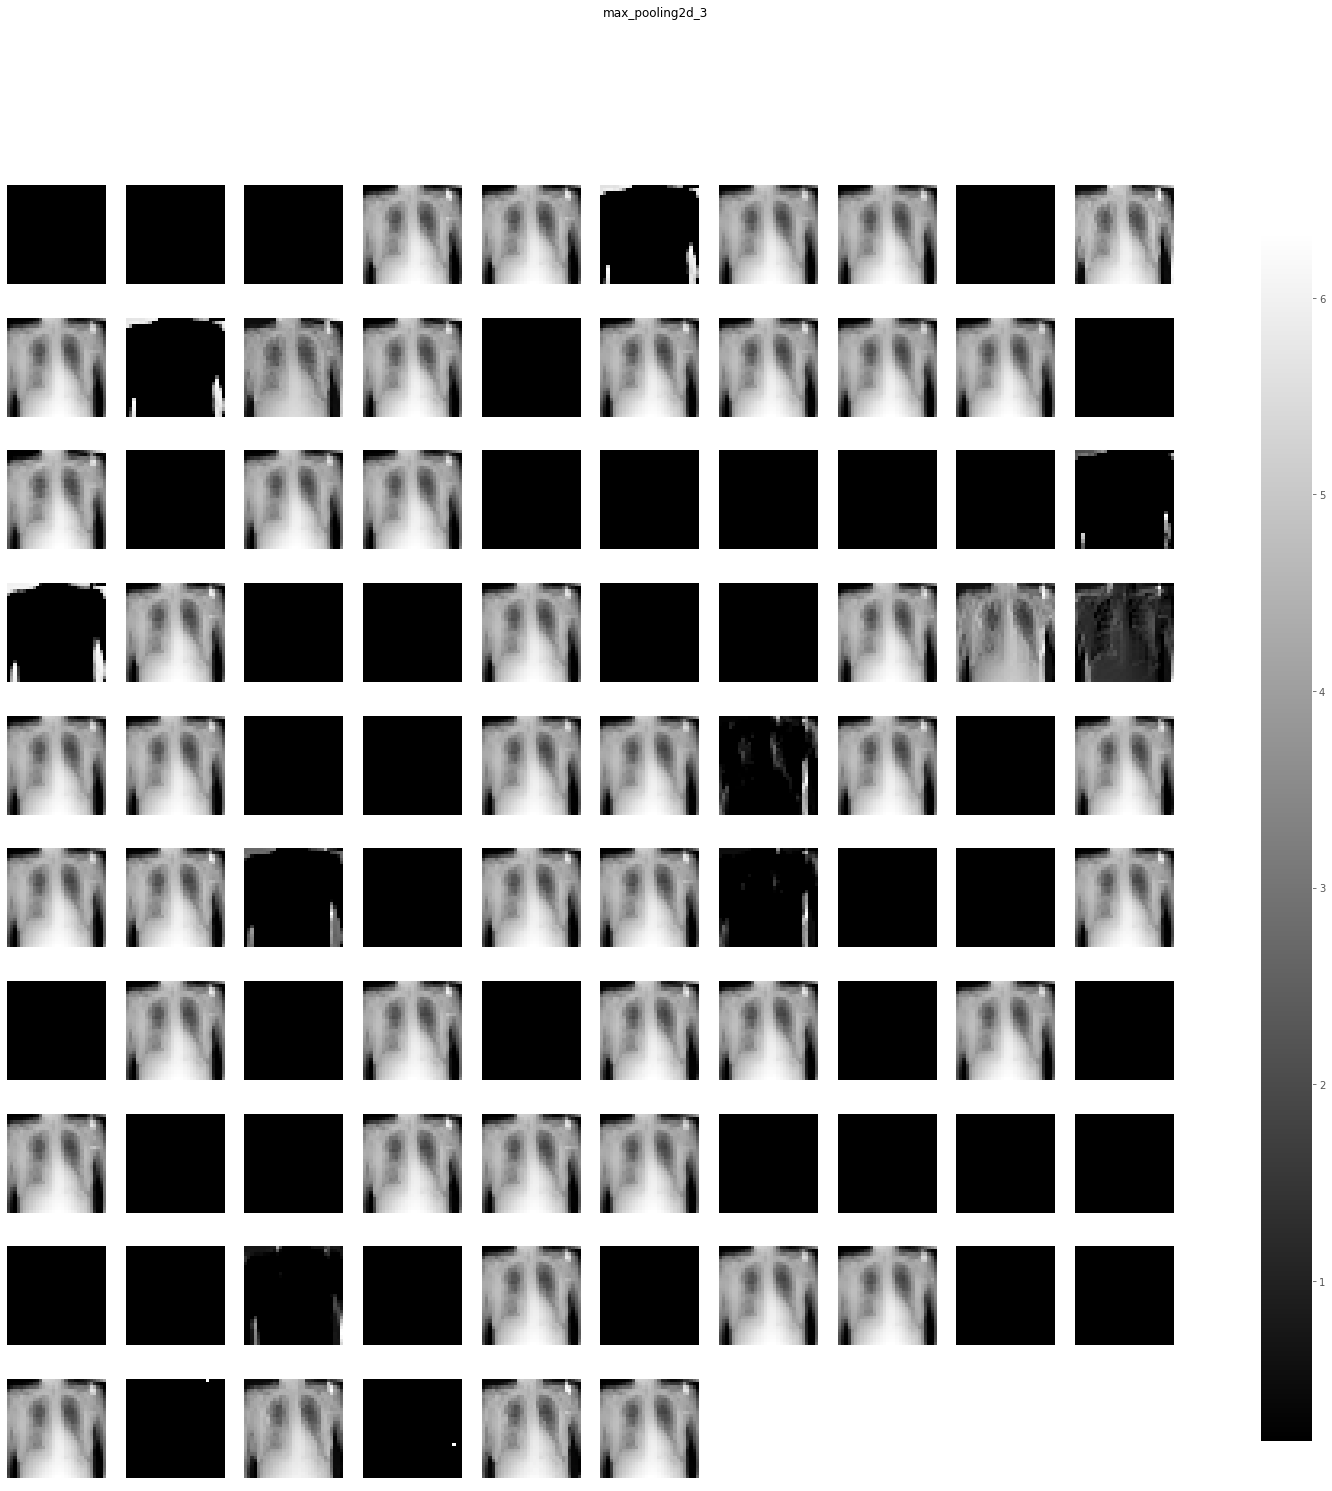

batch_normalization_7 (1, 31, 31, 96) 


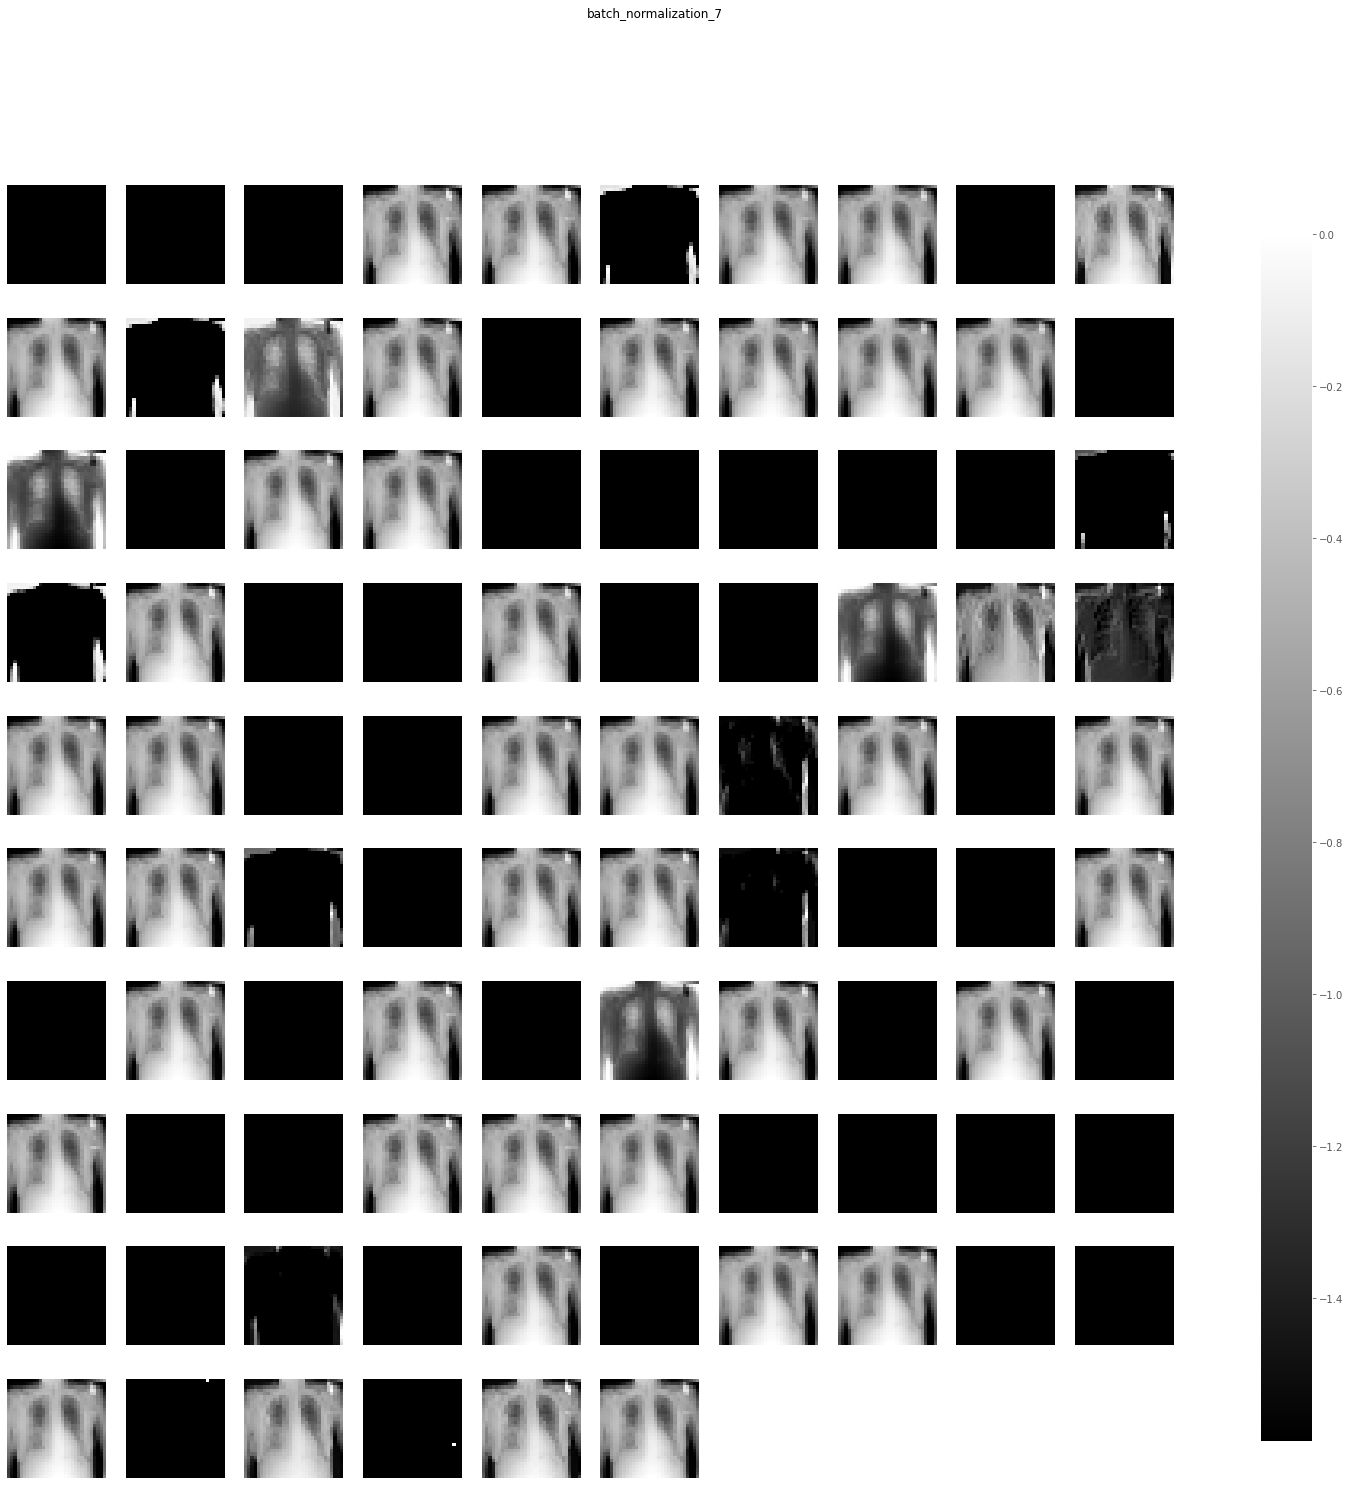

conv2d_6 (1, 21, 21, 256) 


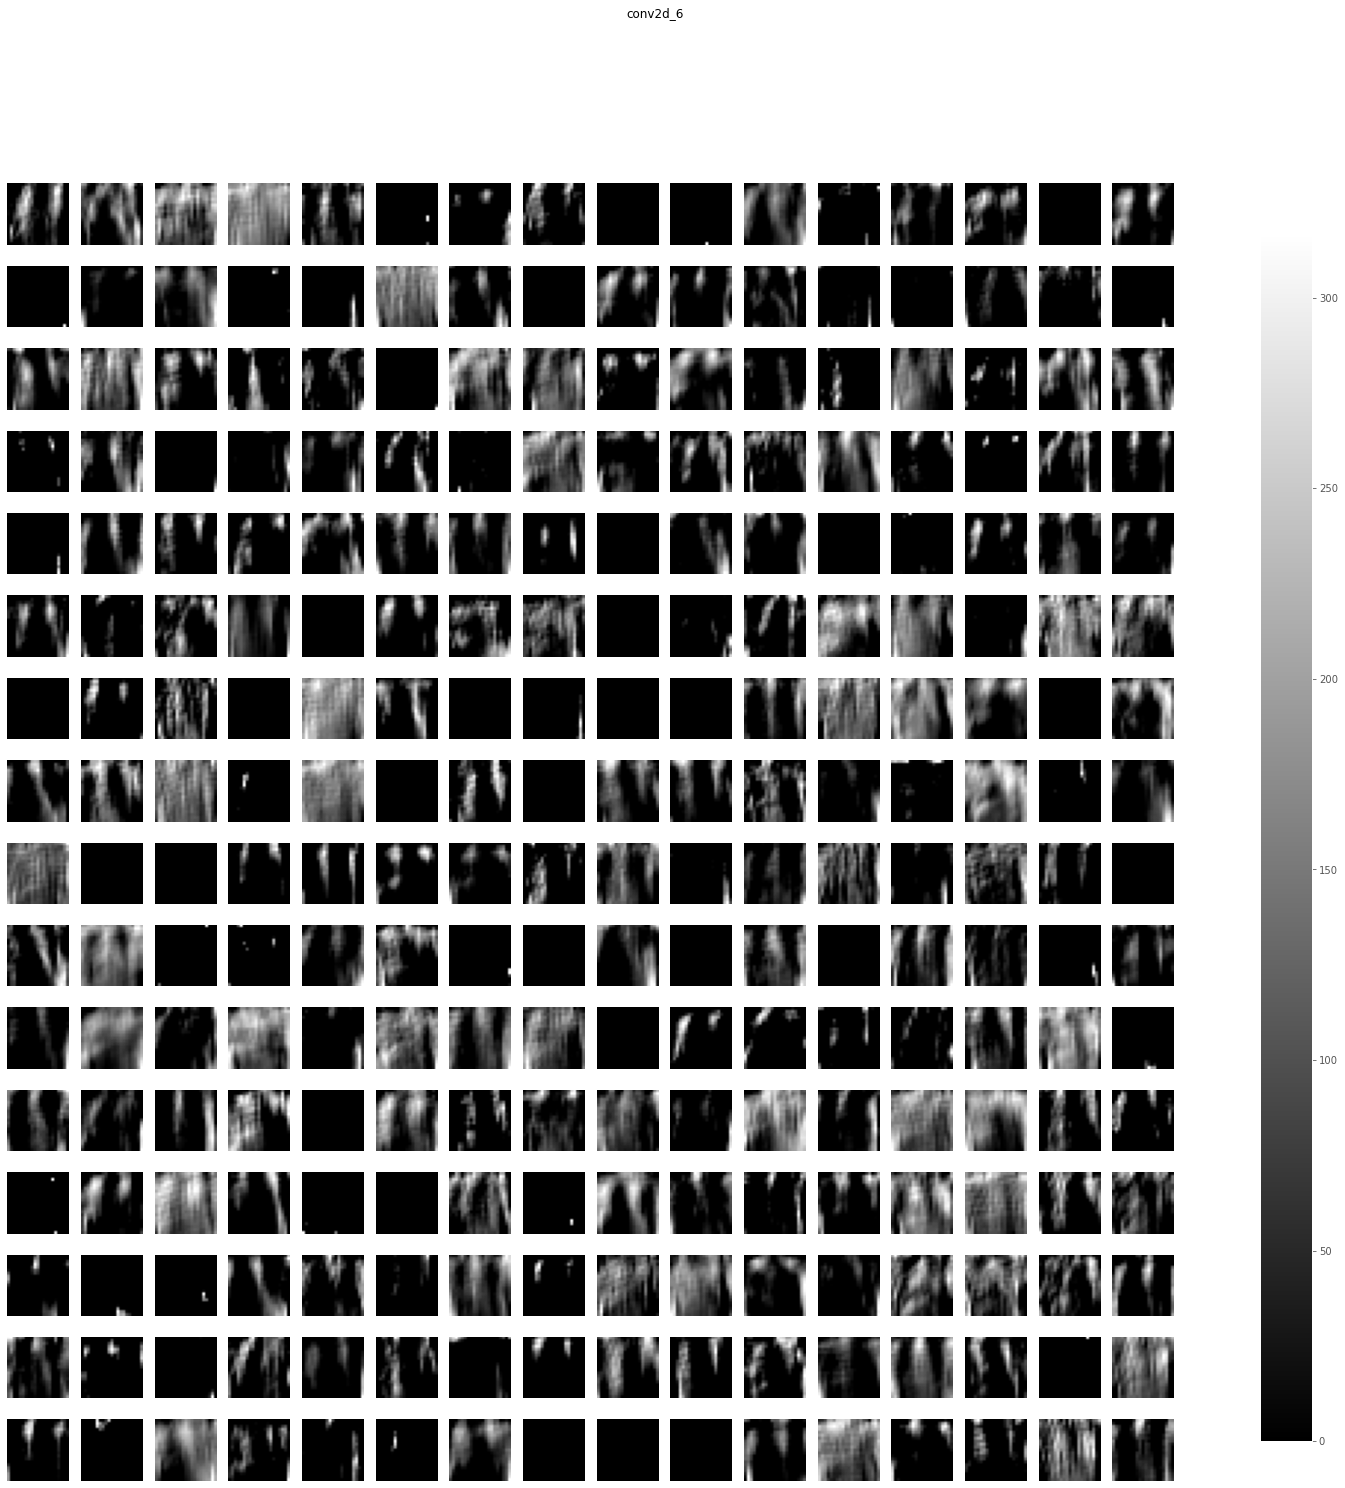

max_pooling2d_4 (1, 10, 10, 256) 


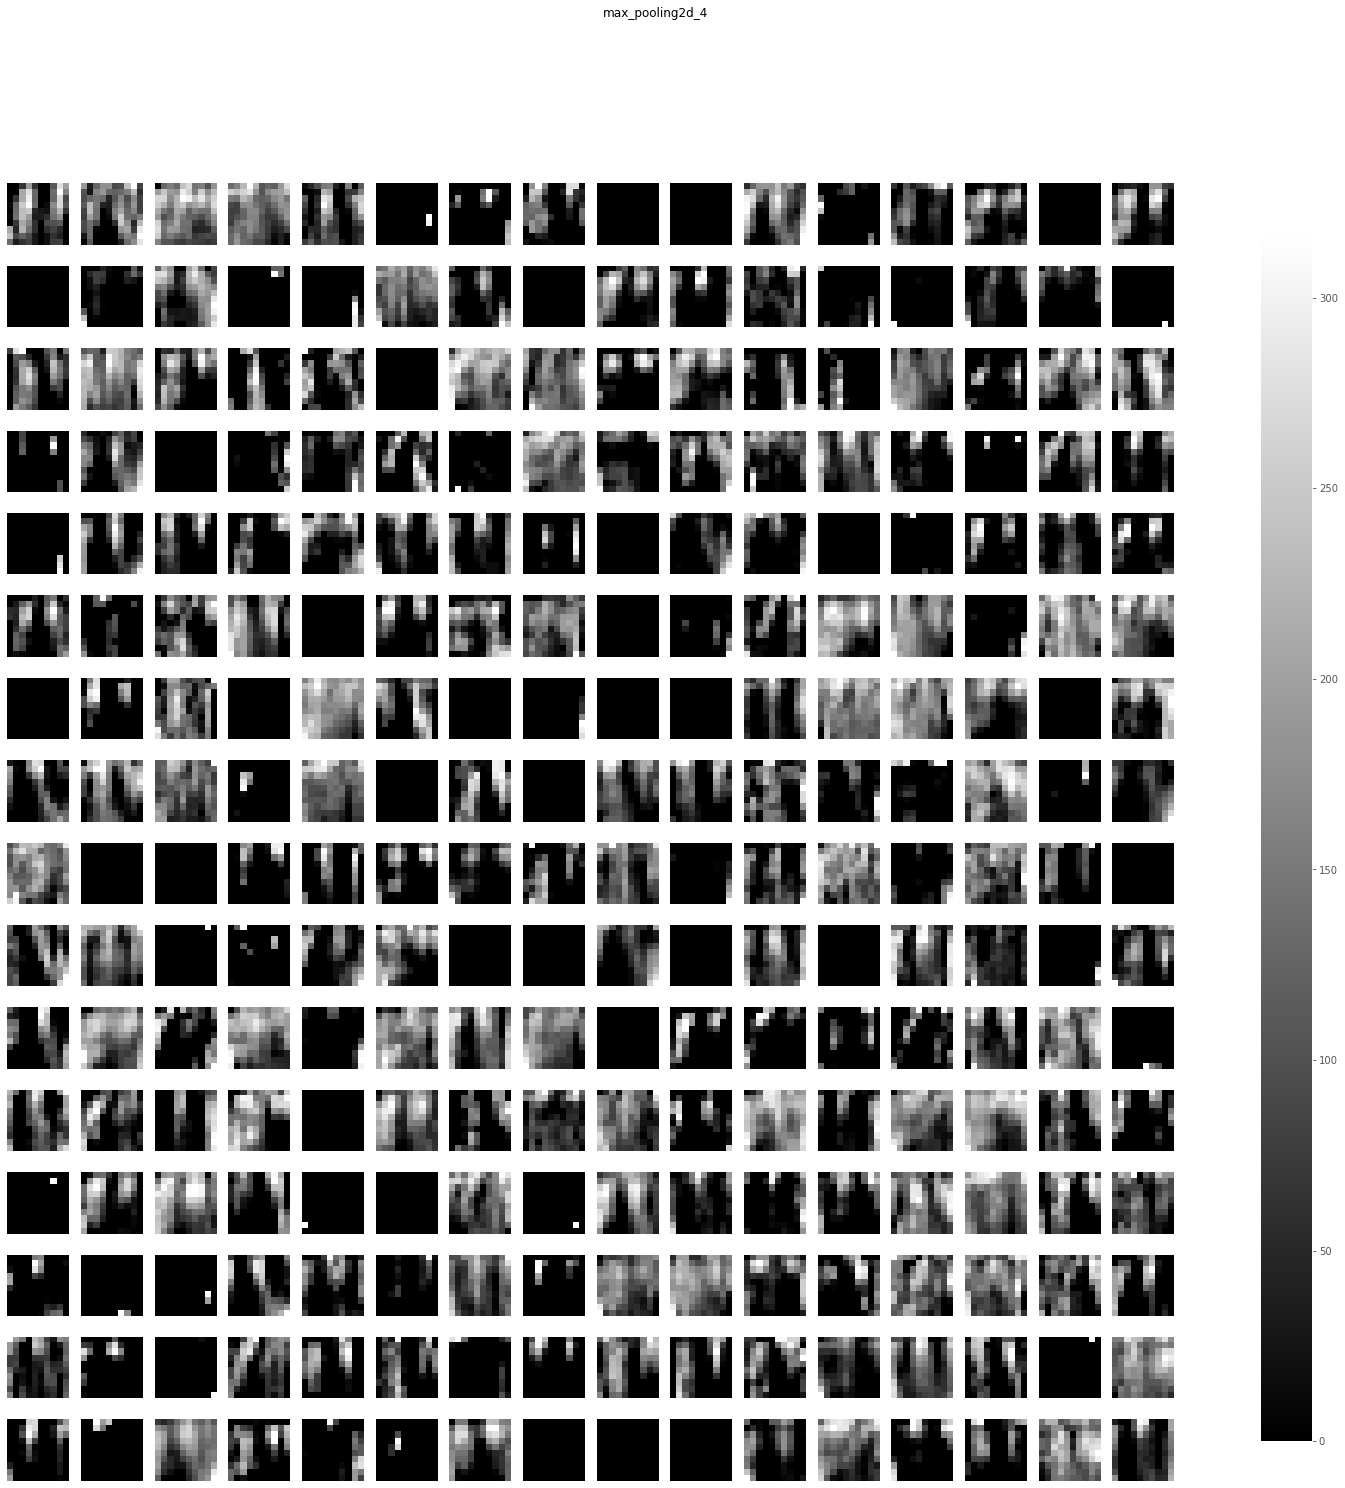

batch_normalization_8 (1, 10, 10, 256) 


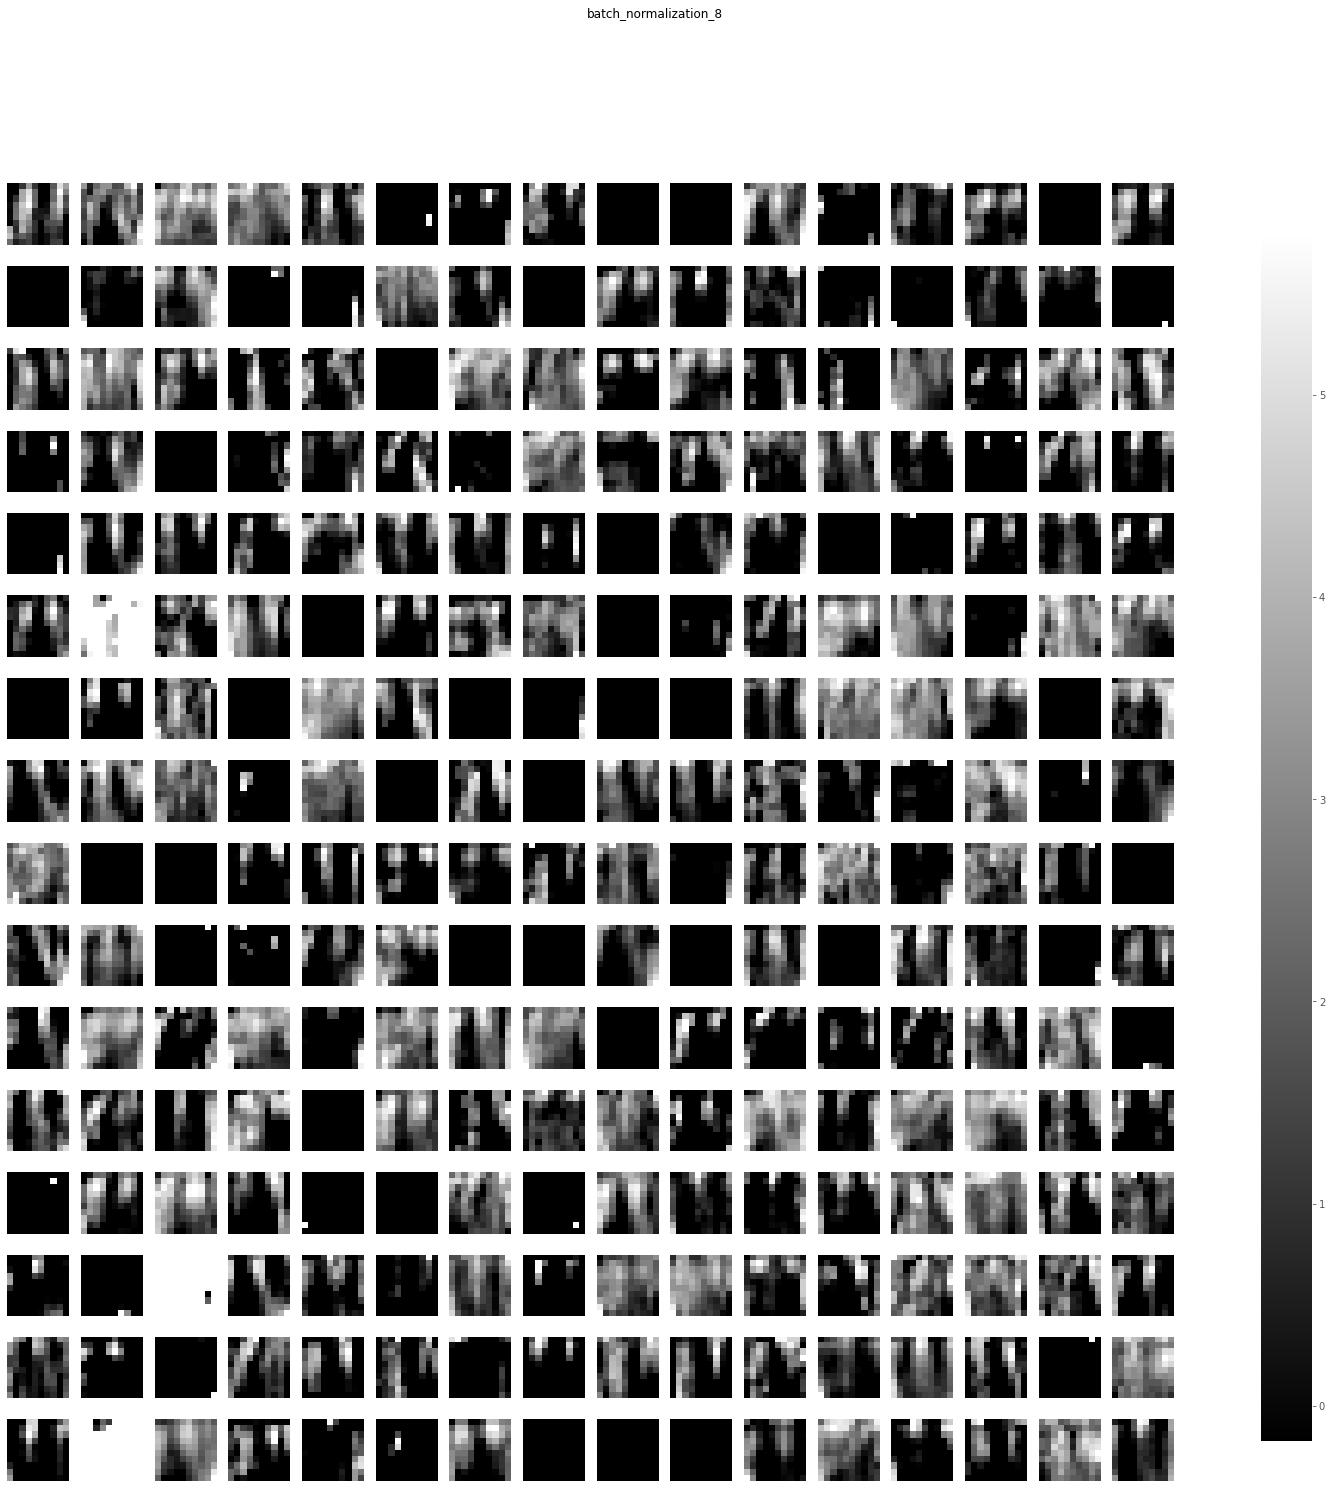

conv2d_7 (1, 8, 8, 384) 


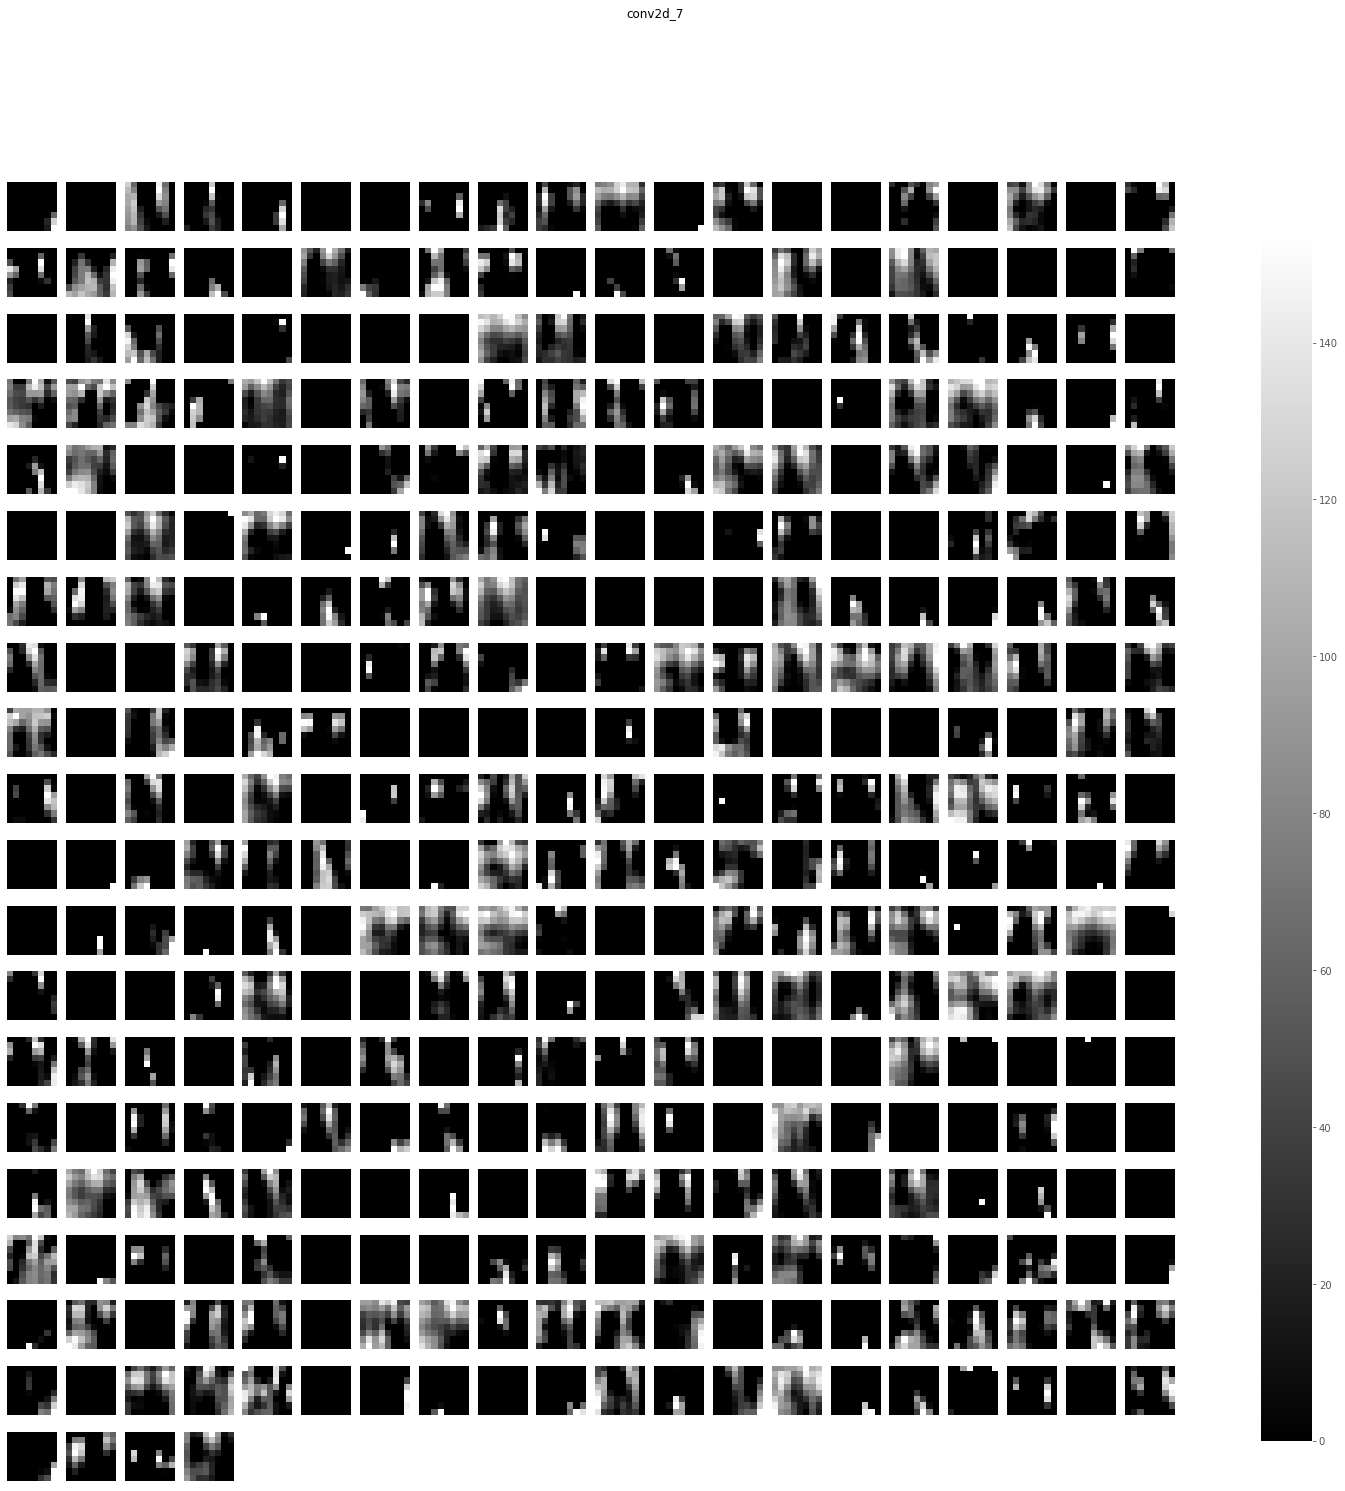

batch_normalization_9 (1, 8, 8, 384) 


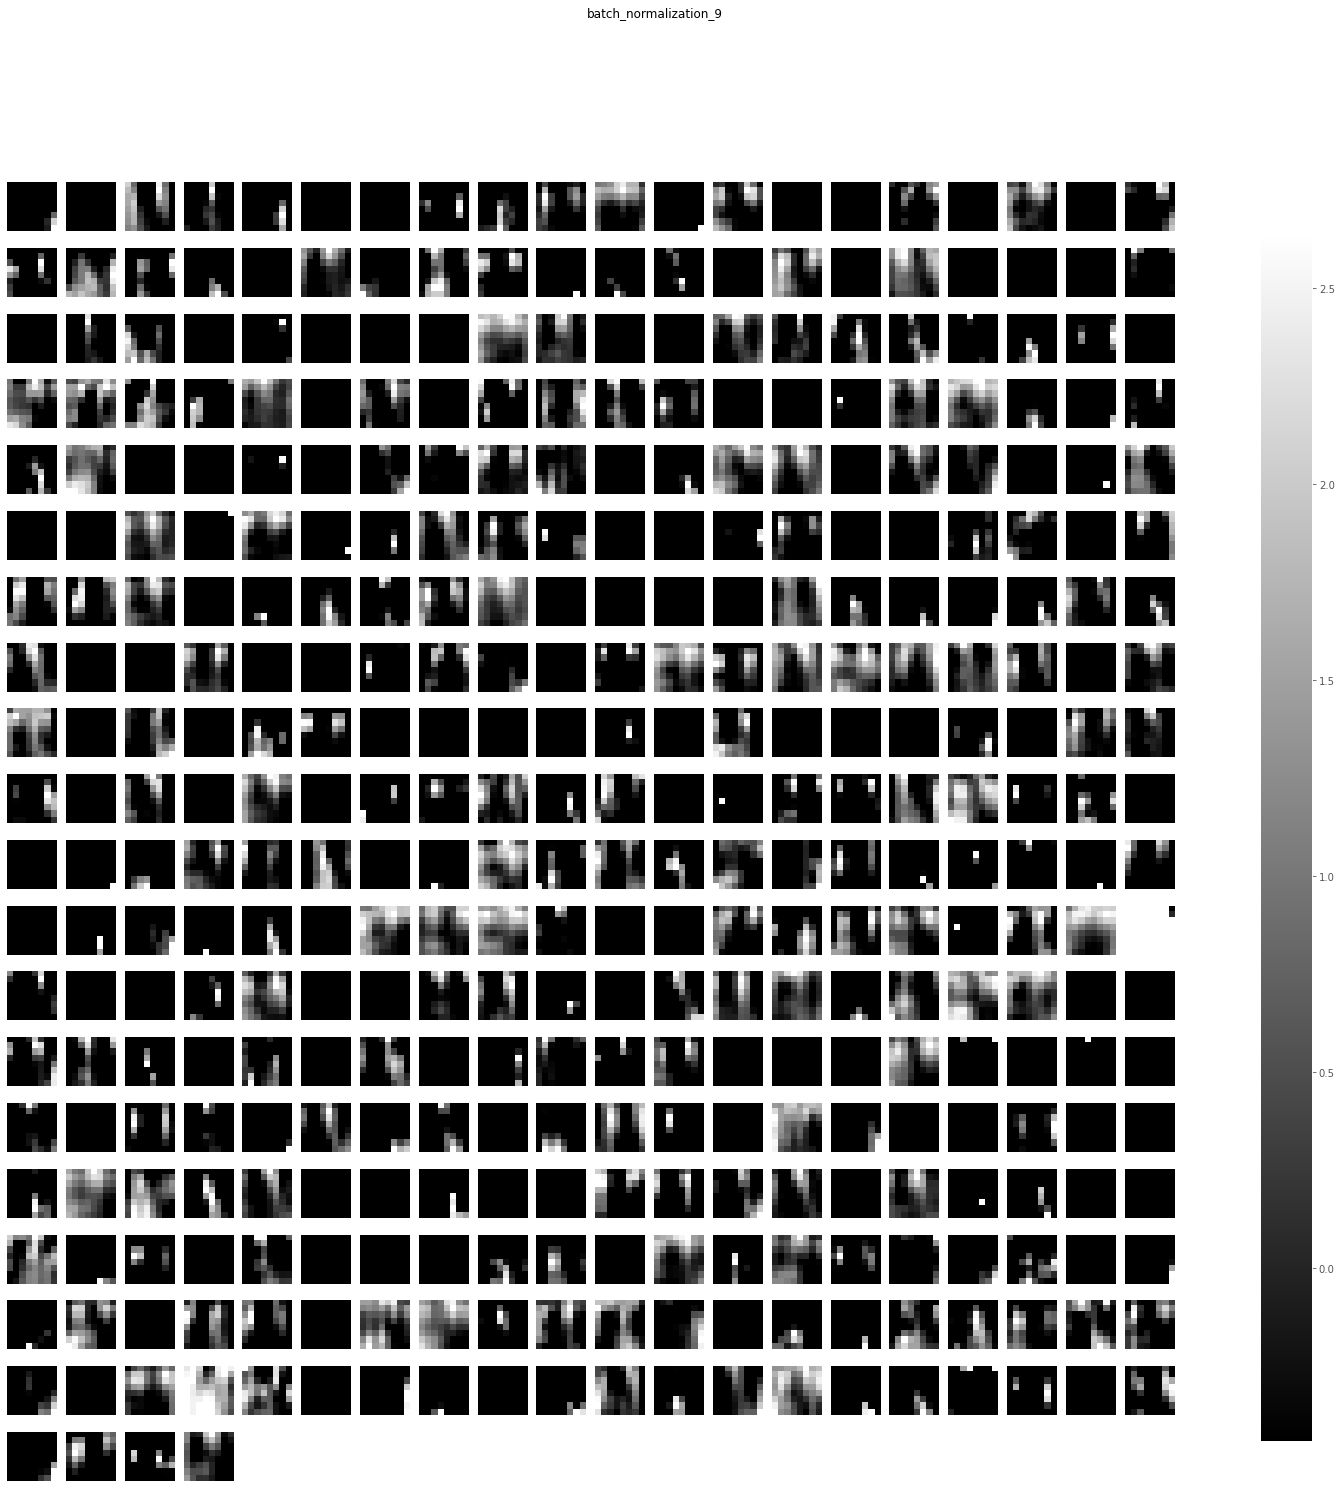

conv2d_8 (1, 6, 6, 384) 


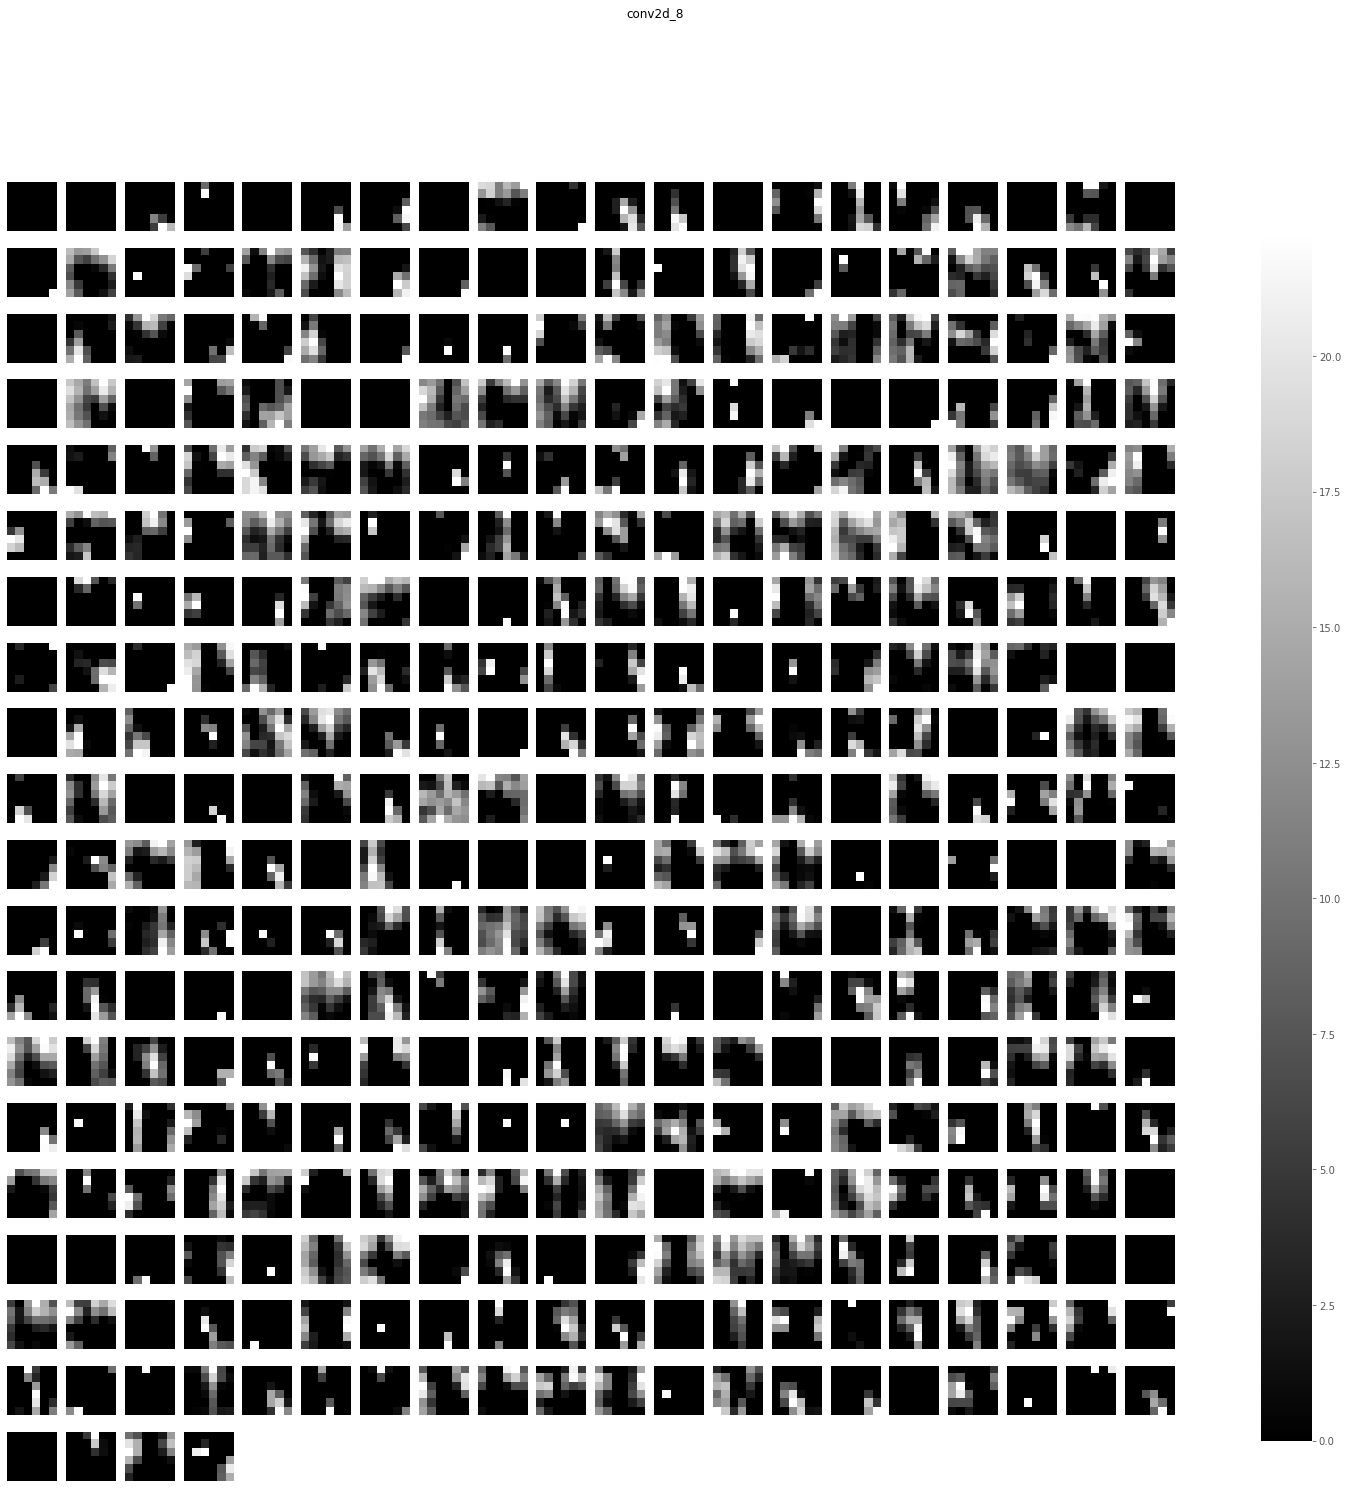

batch_normalization_10 (1, 6, 6, 384) 


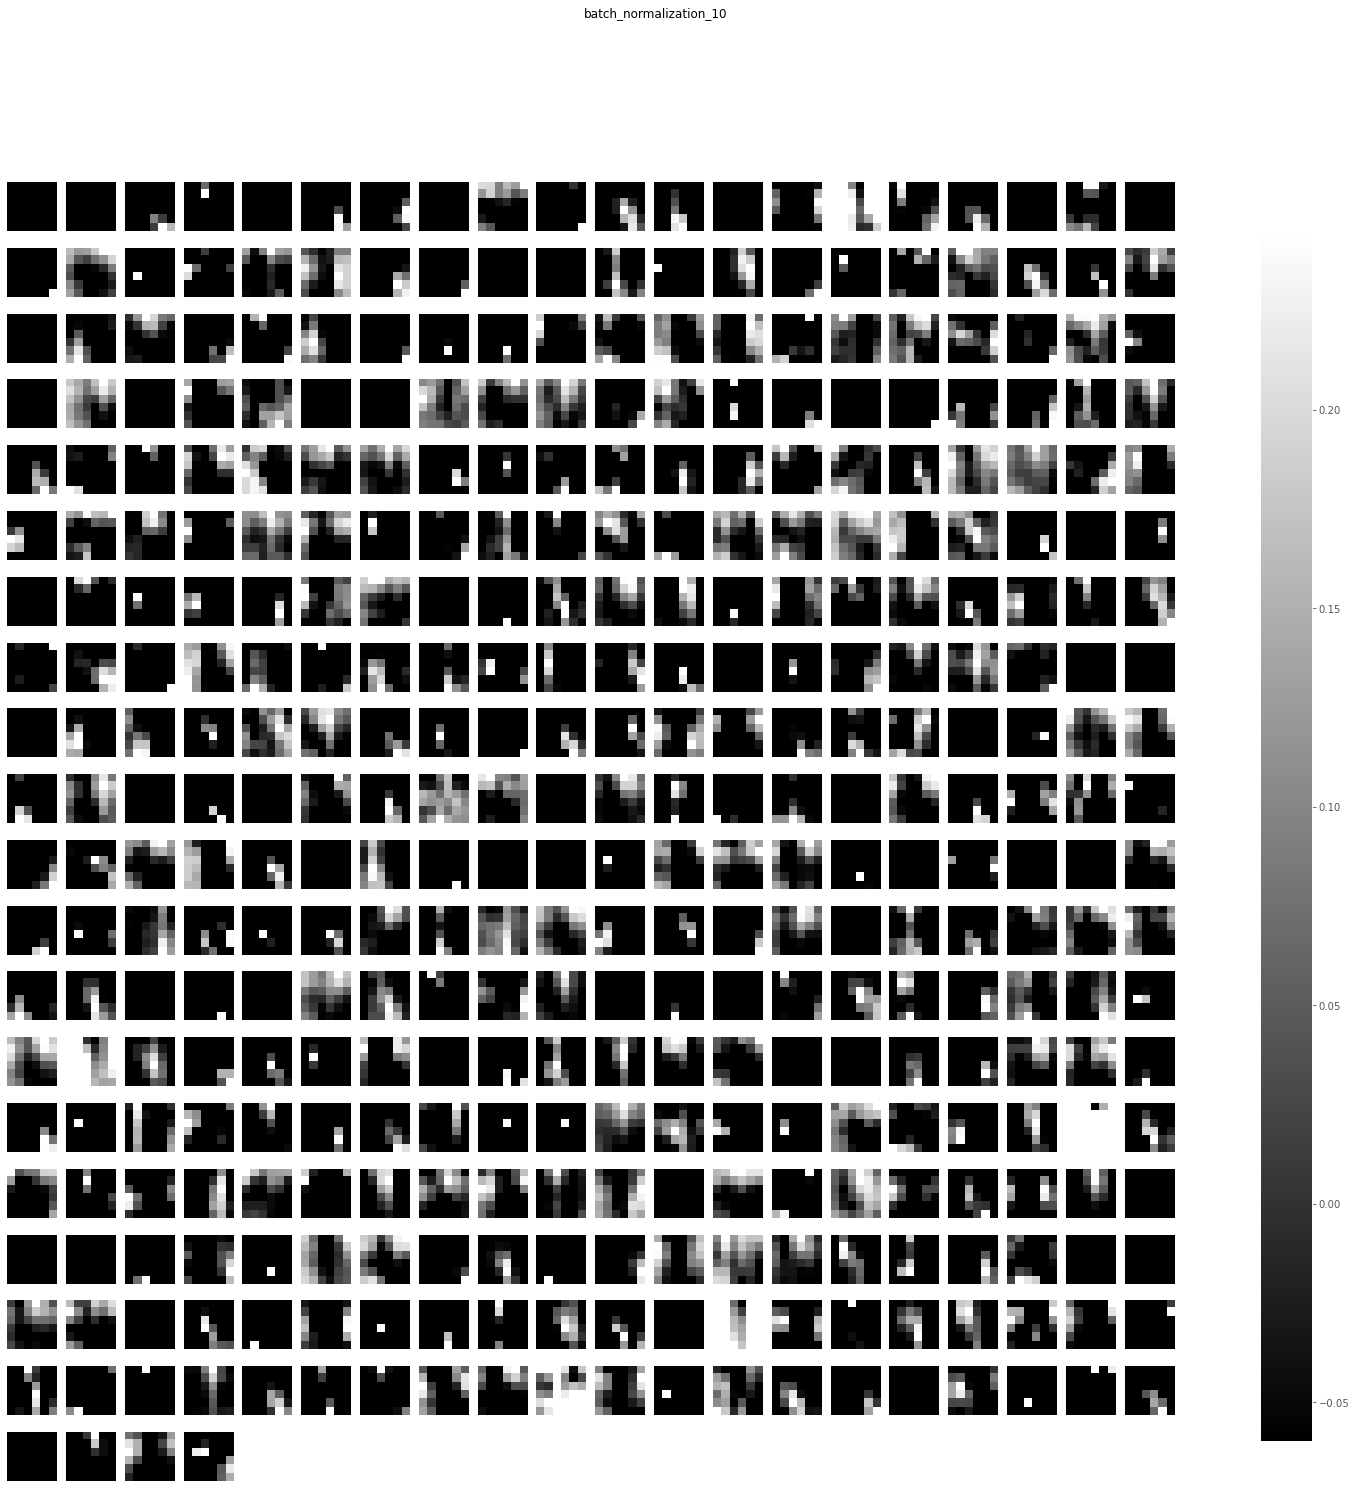

conv2d_9 (1, 4, 4, 256) 


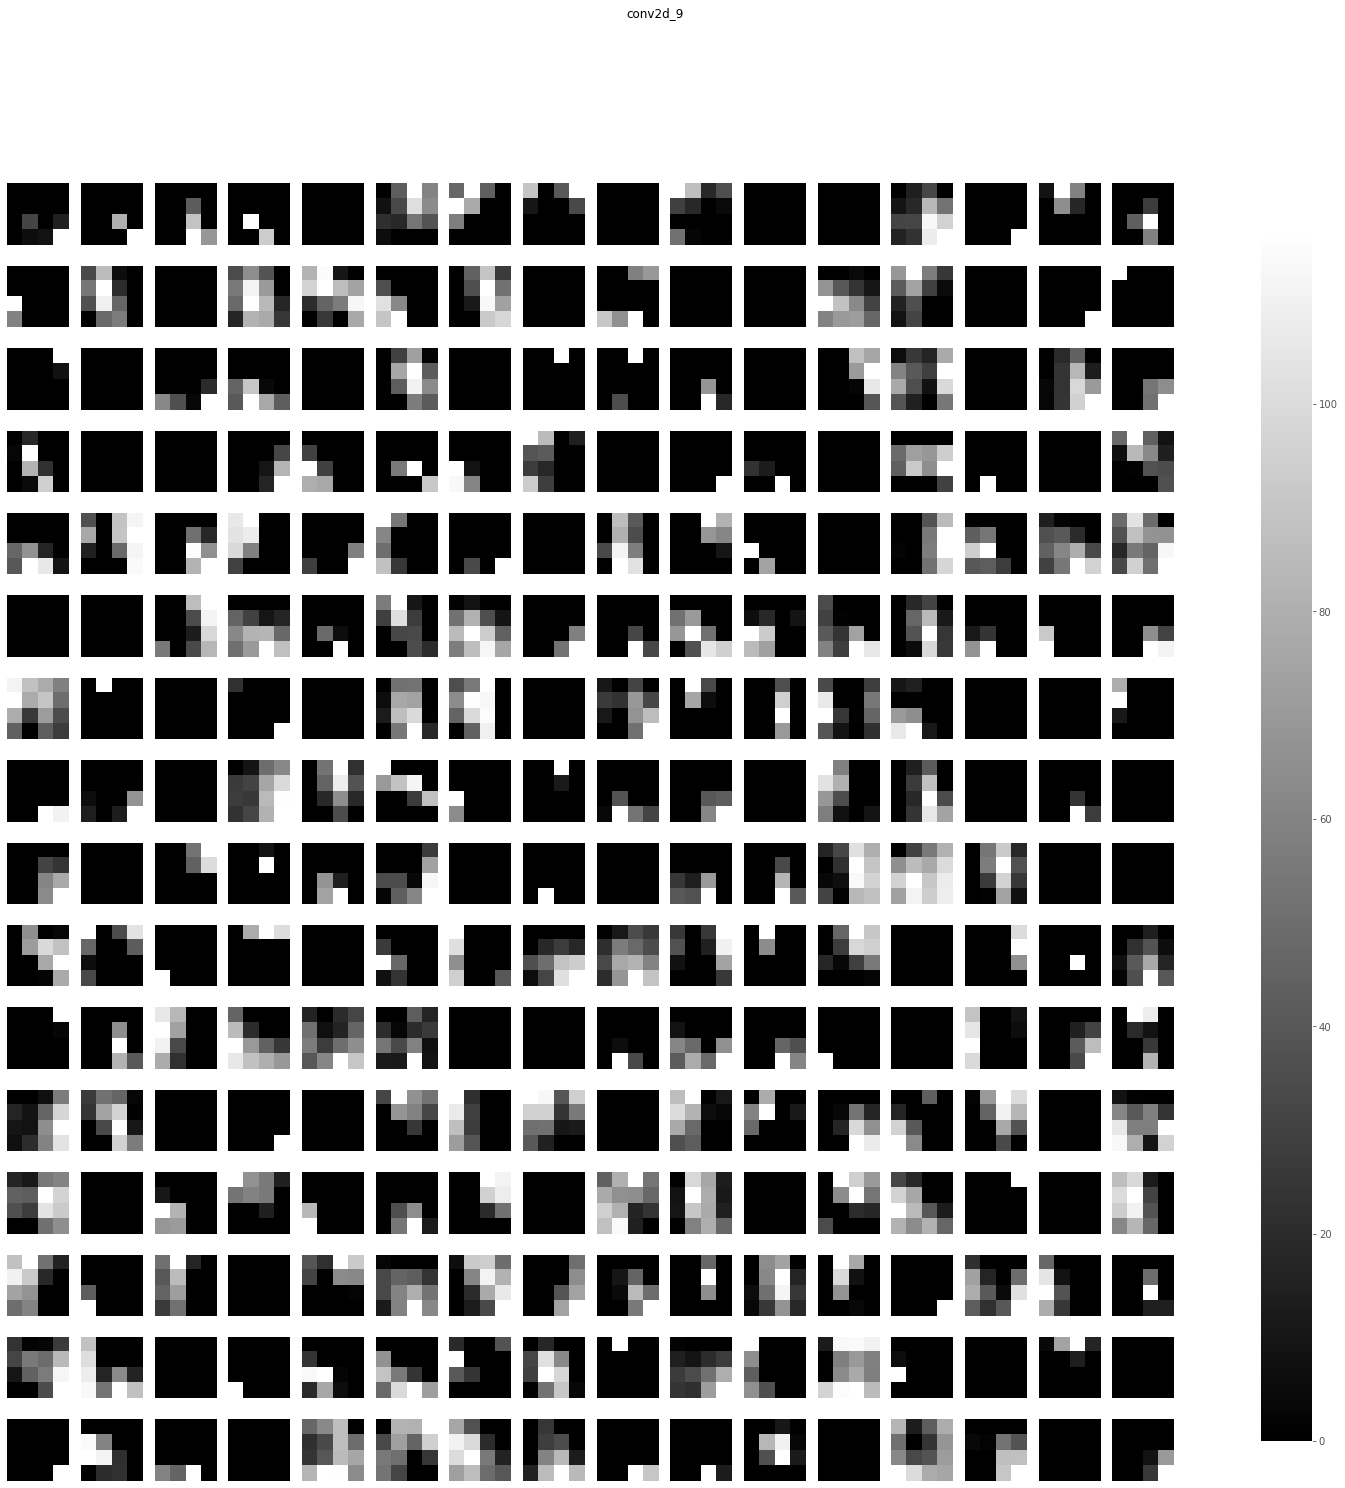

max_pooling2d_5 (1, 2, 2, 256) 


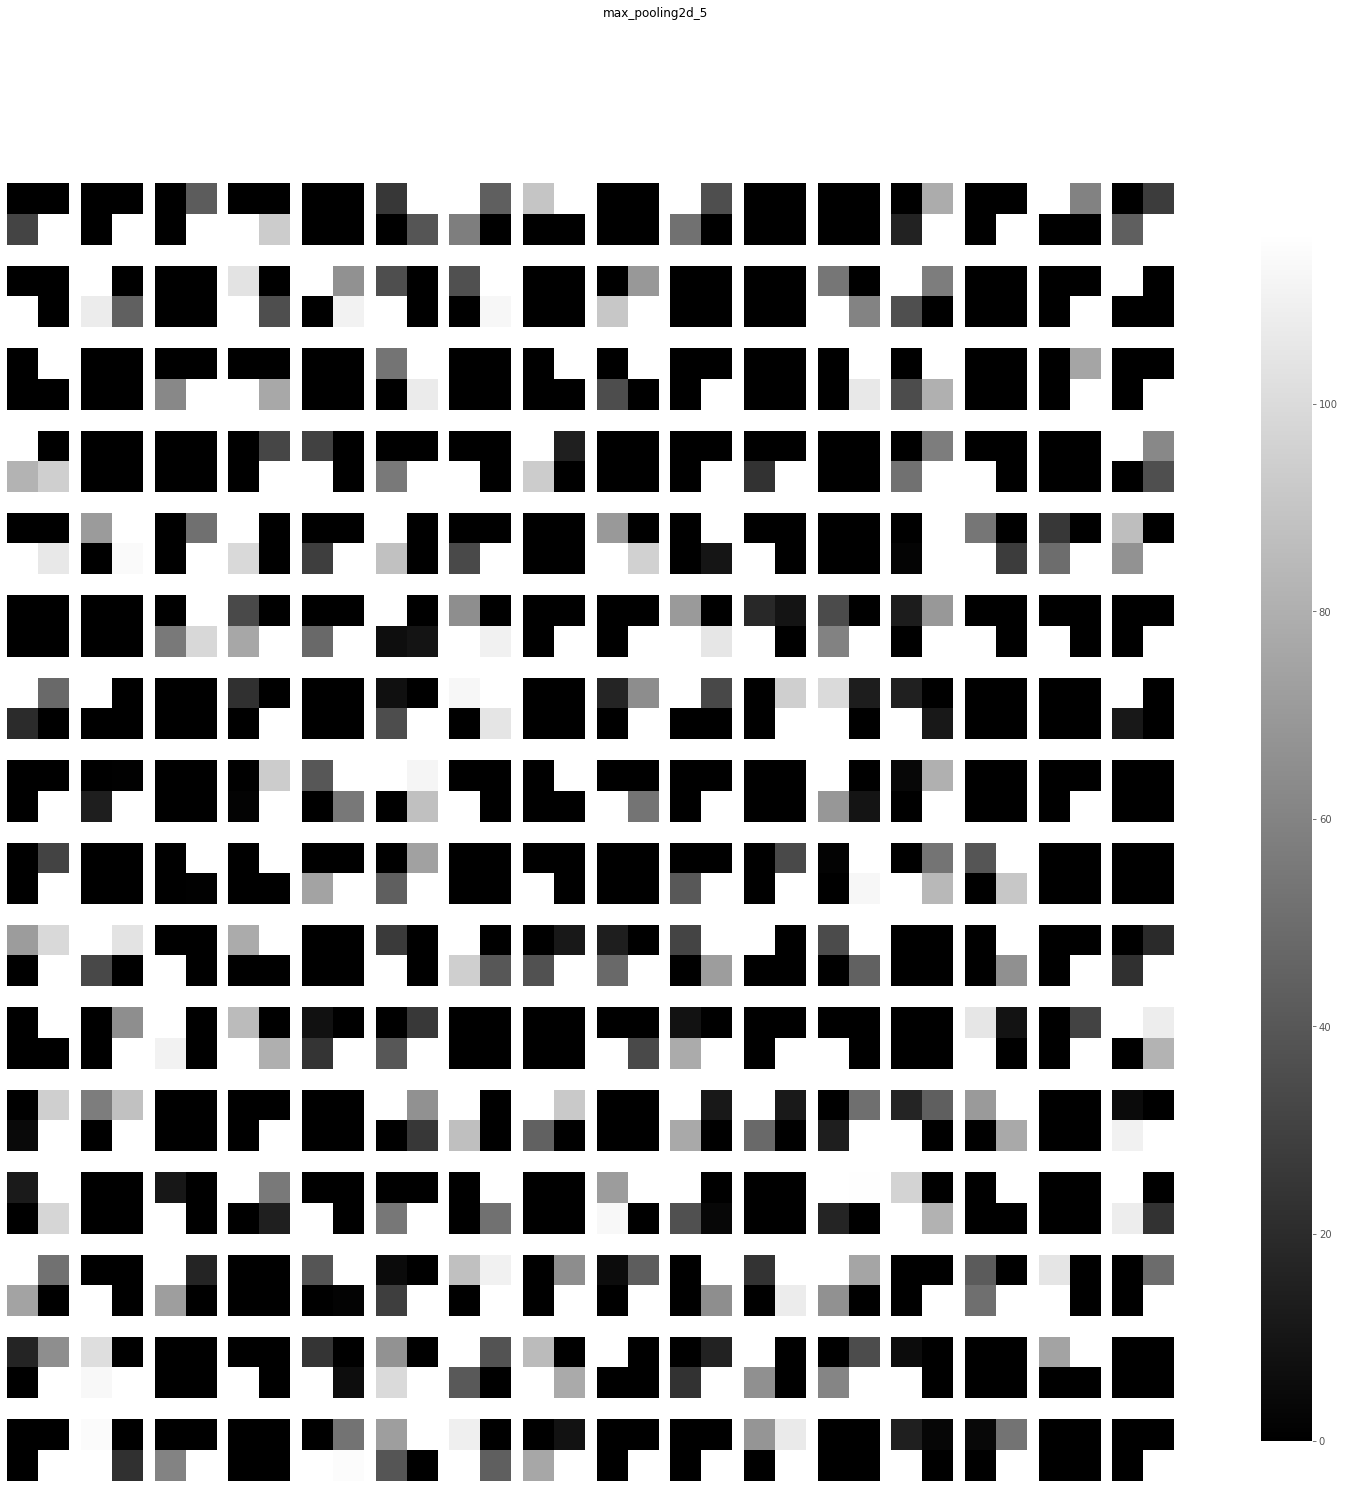

batch_normalization_11 (1, 2, 2, 256) 


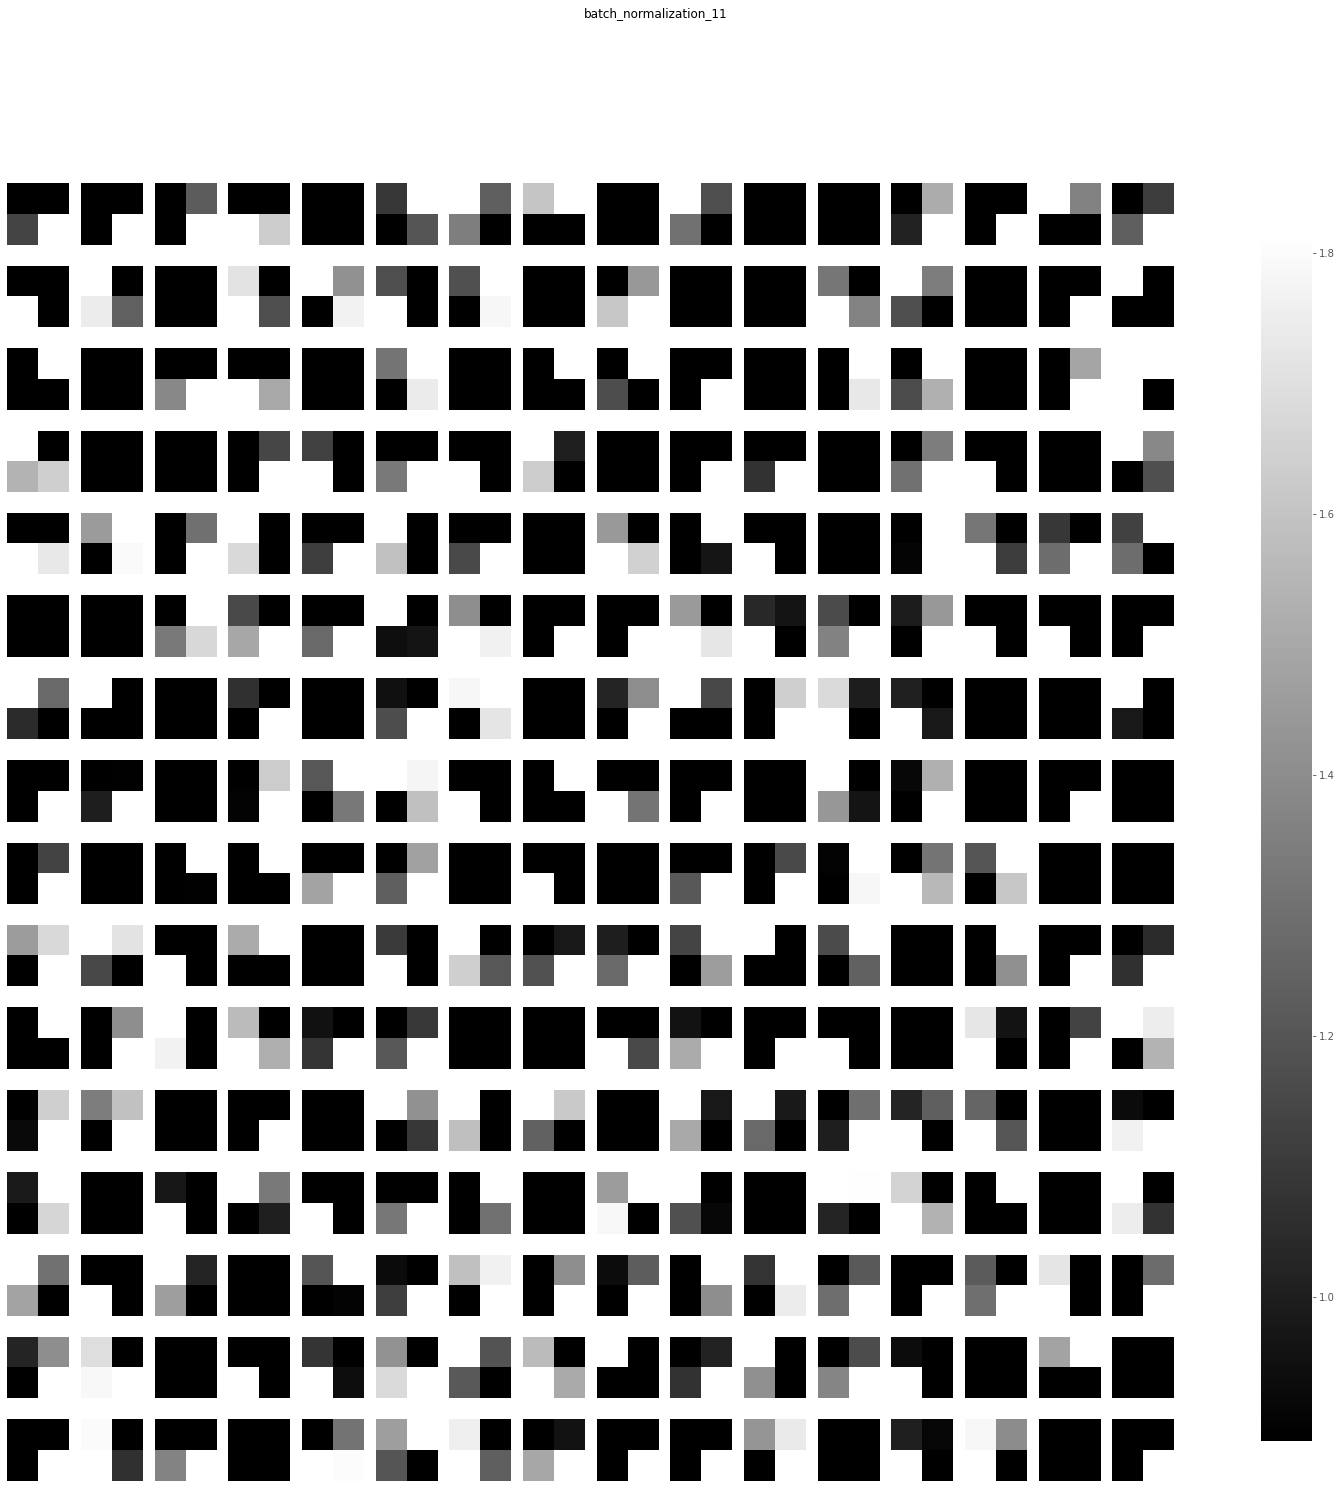

flatten_1 (1, 1024) 


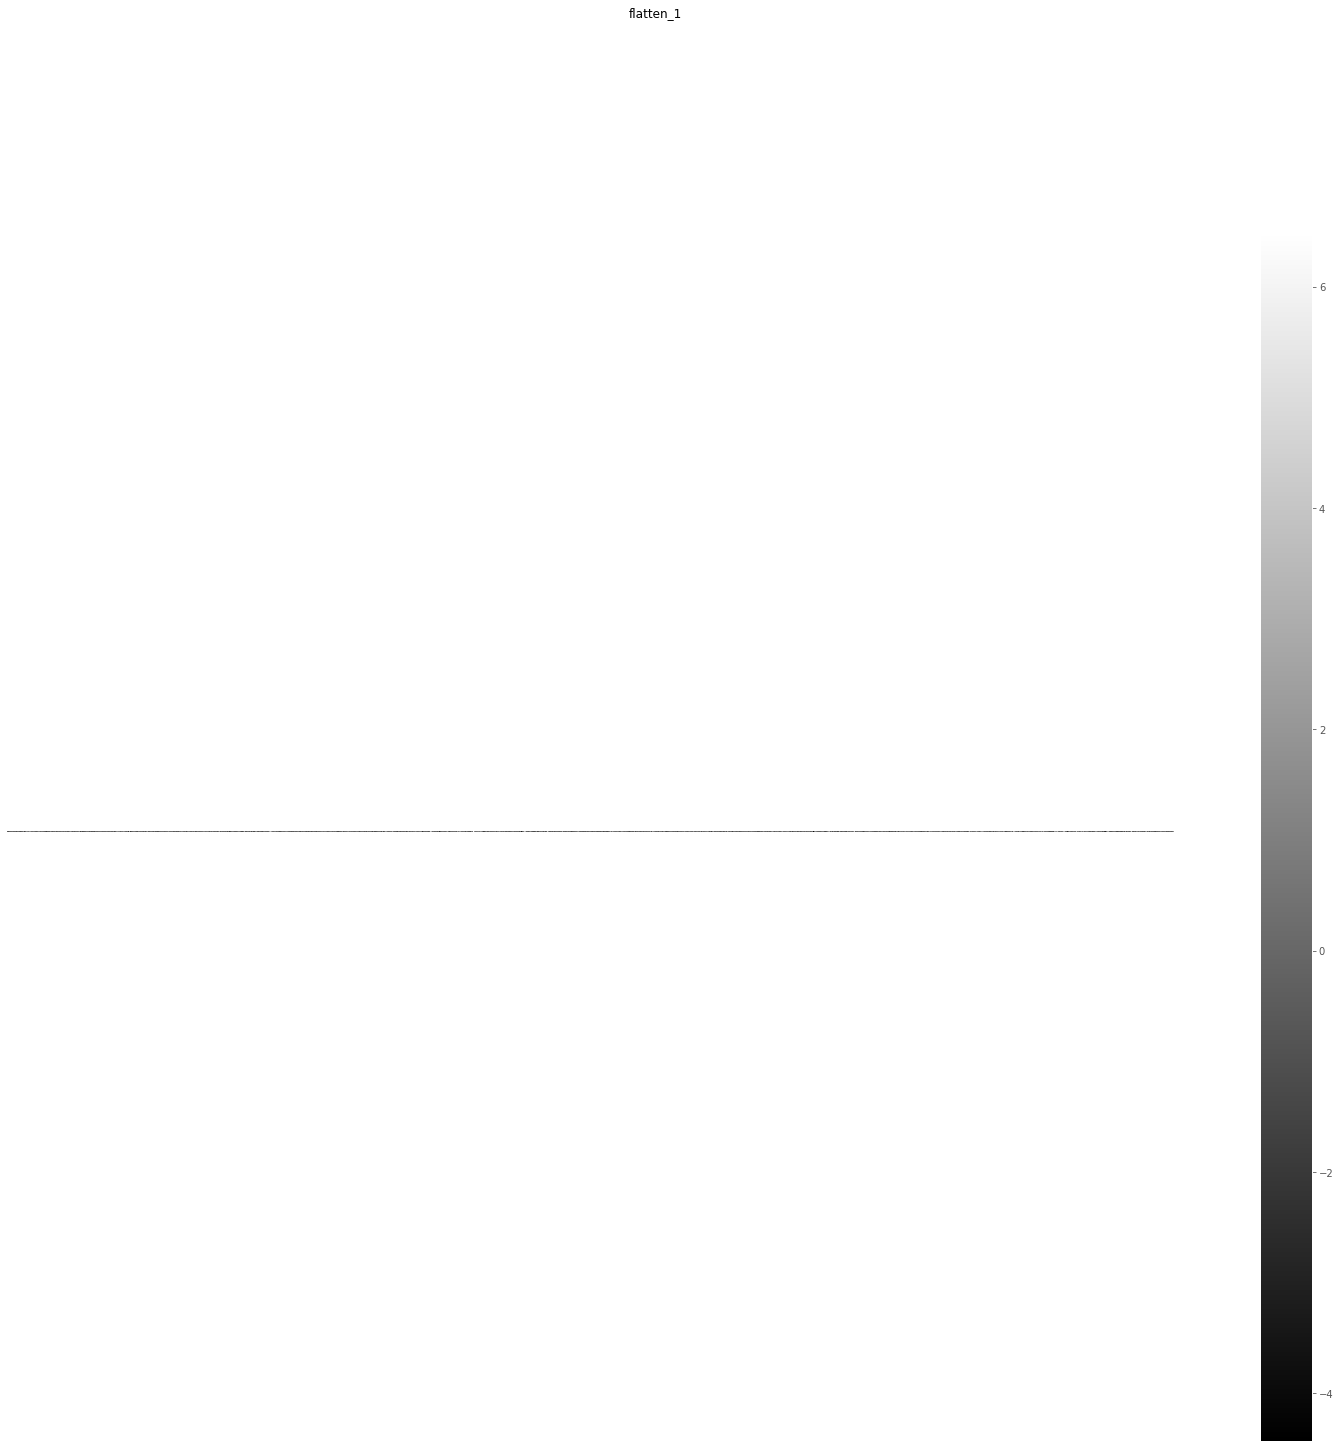

dense_3 (1, 4096) 


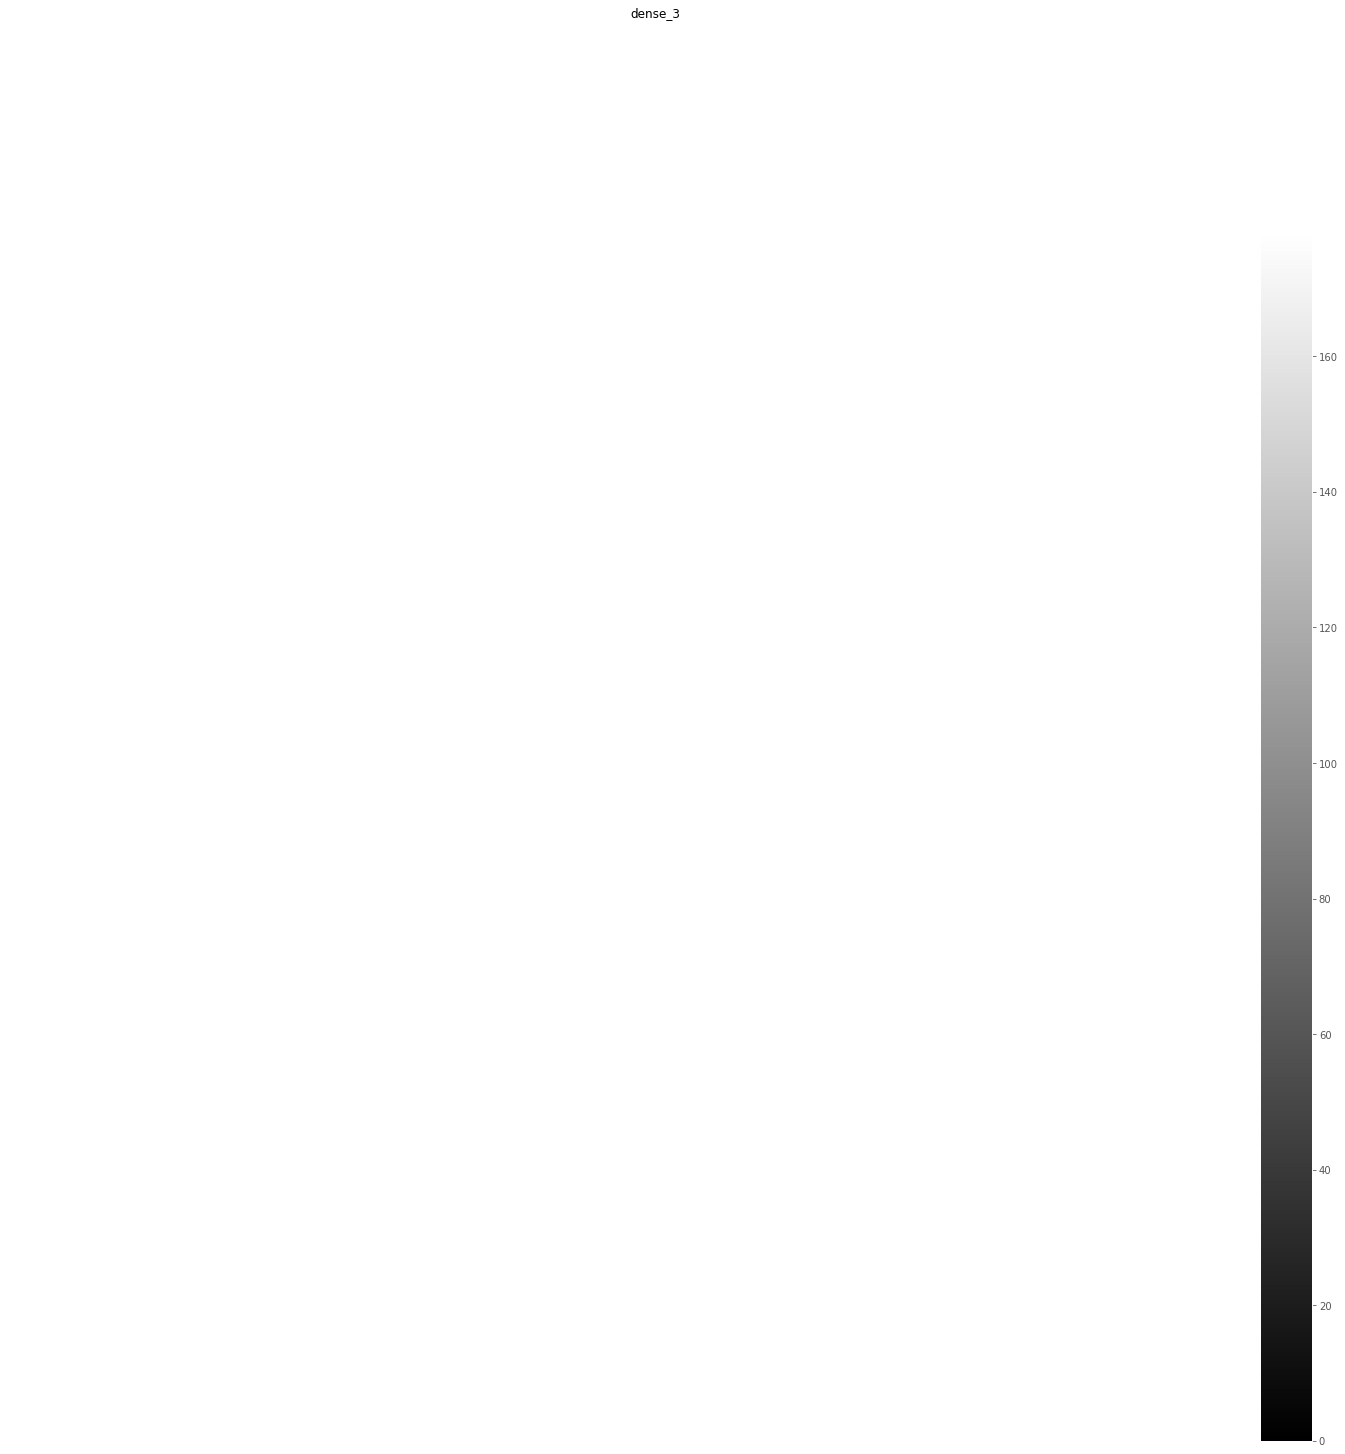

dropout_2 (1, 4096) 


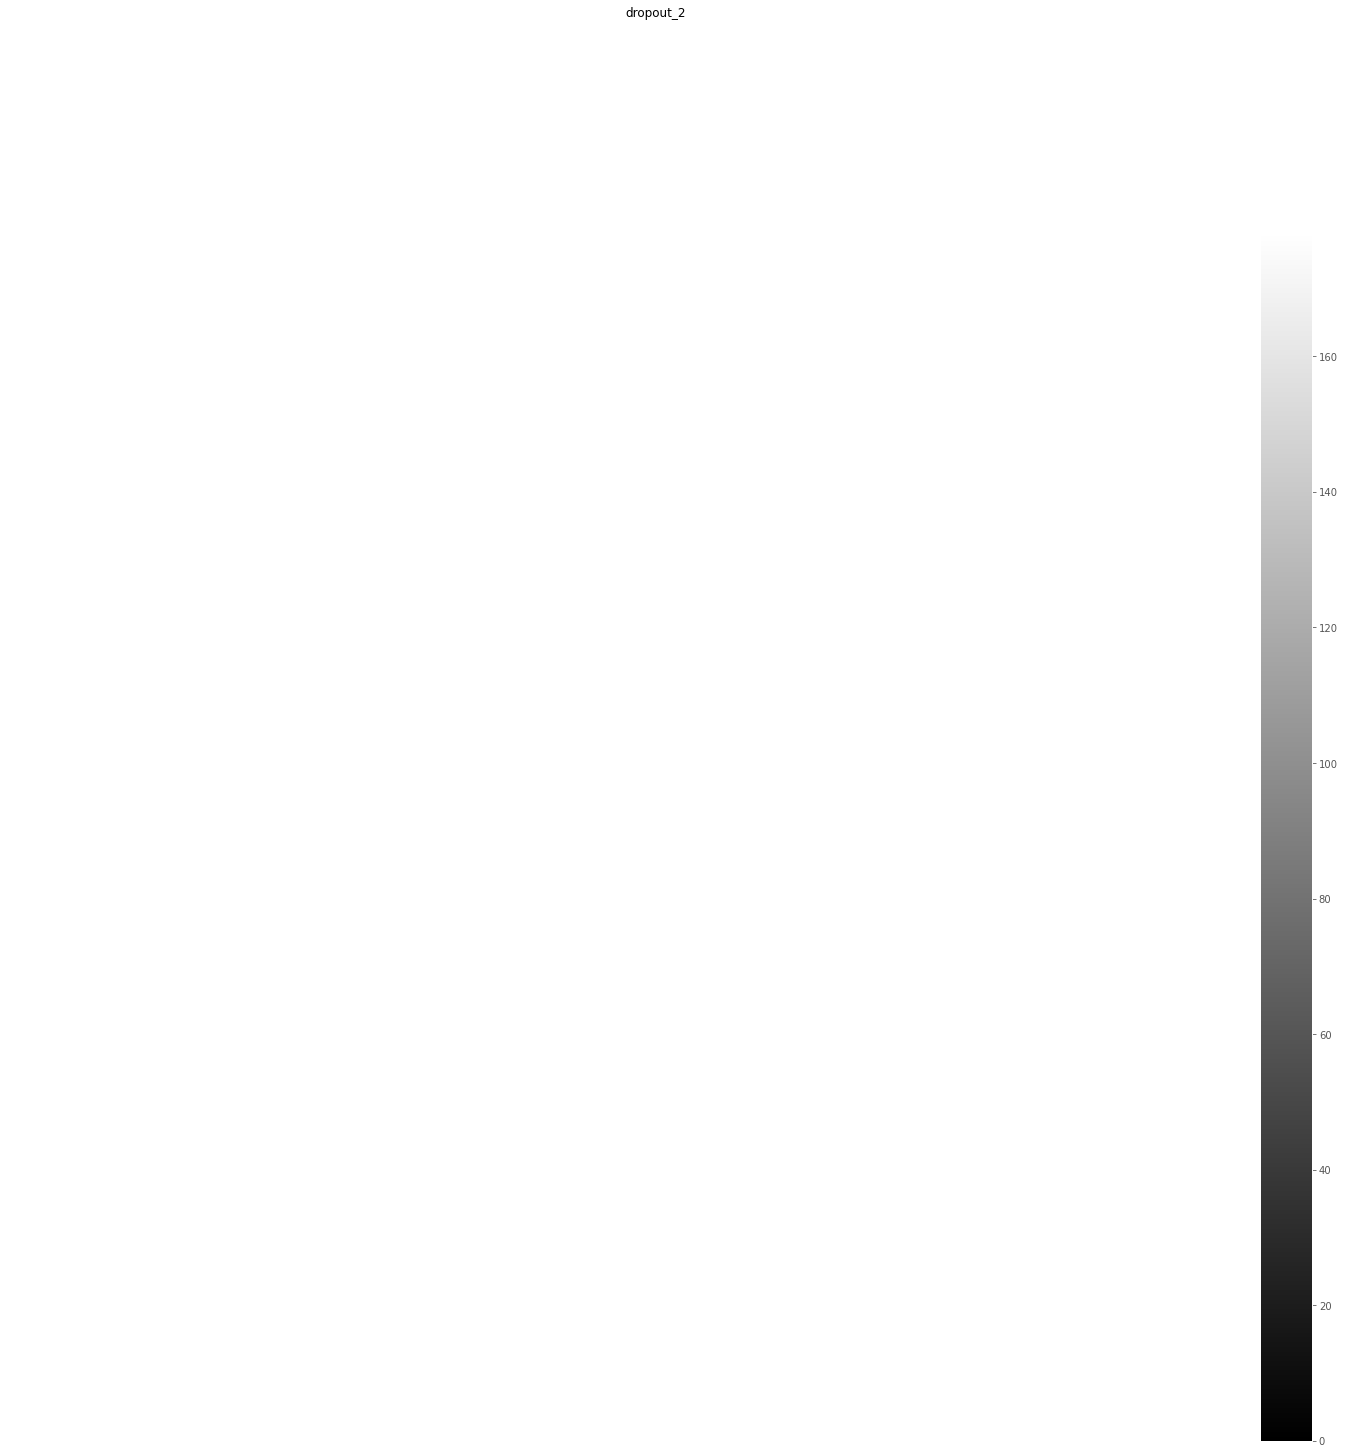

batch_normalization_12 (1, 4096) 


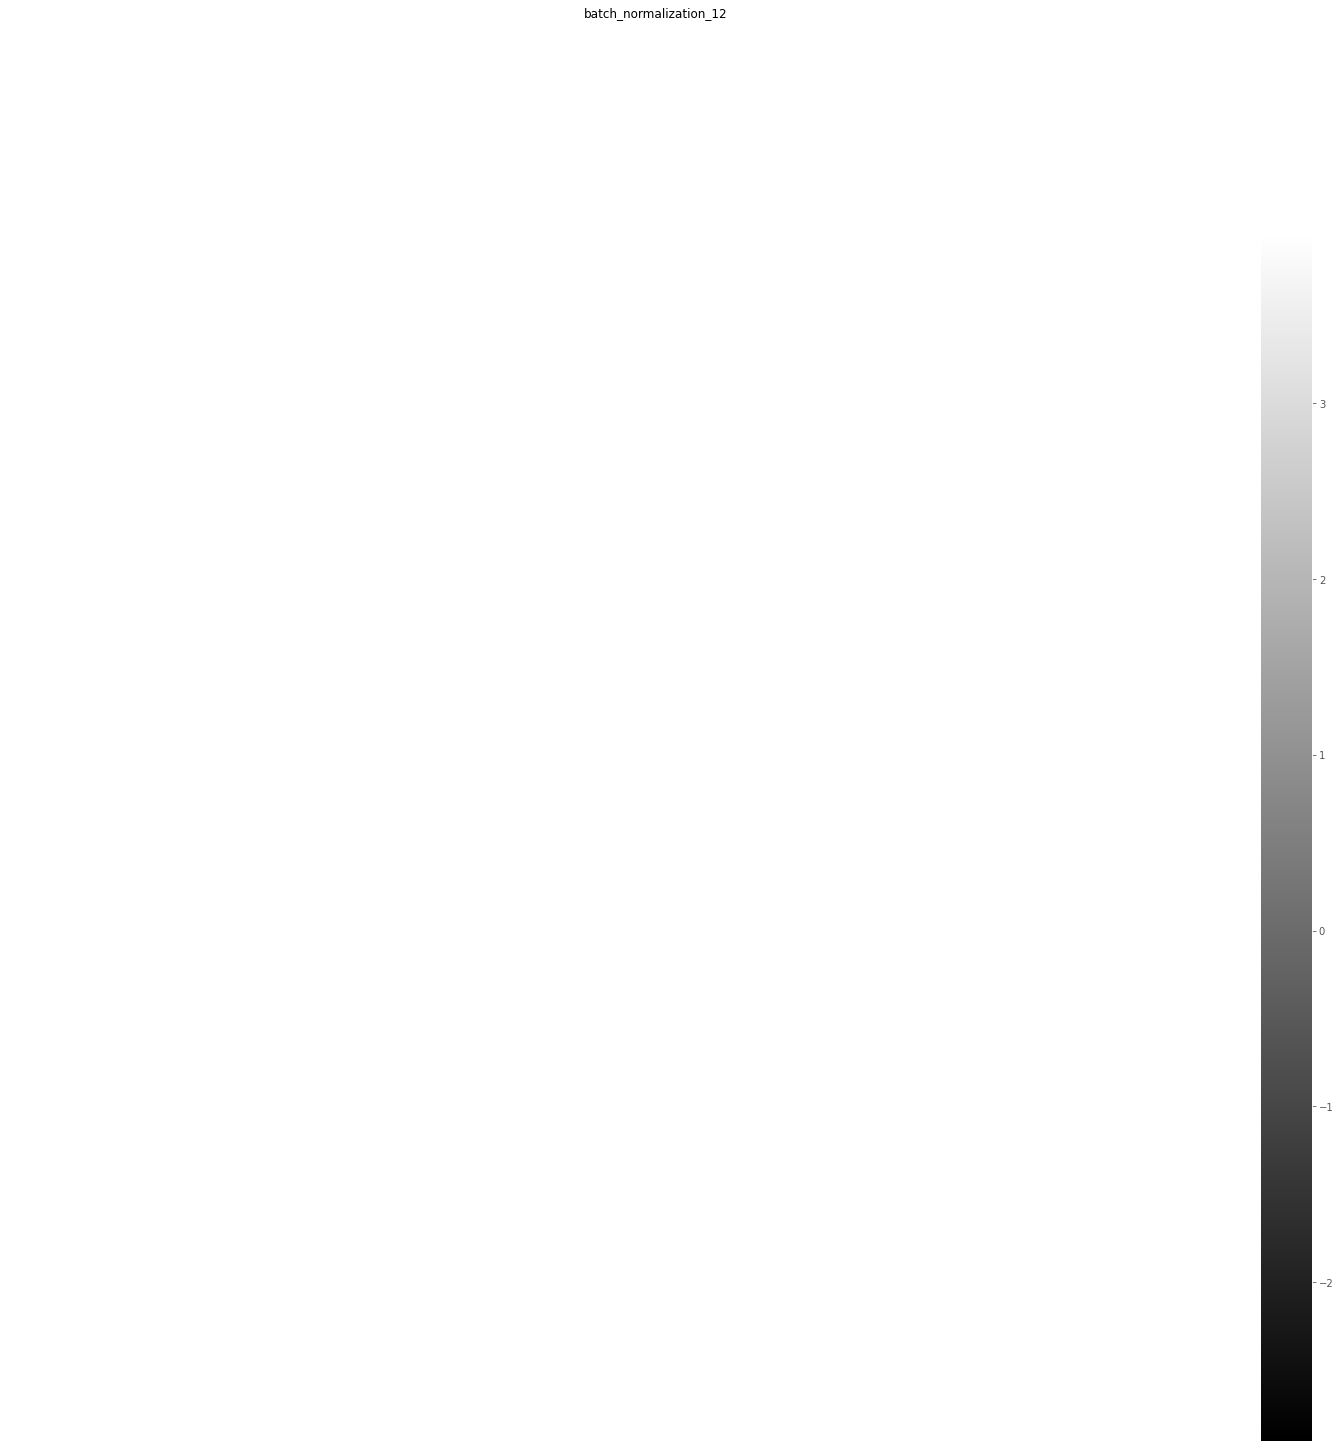

dense_4 (1, 1000) 


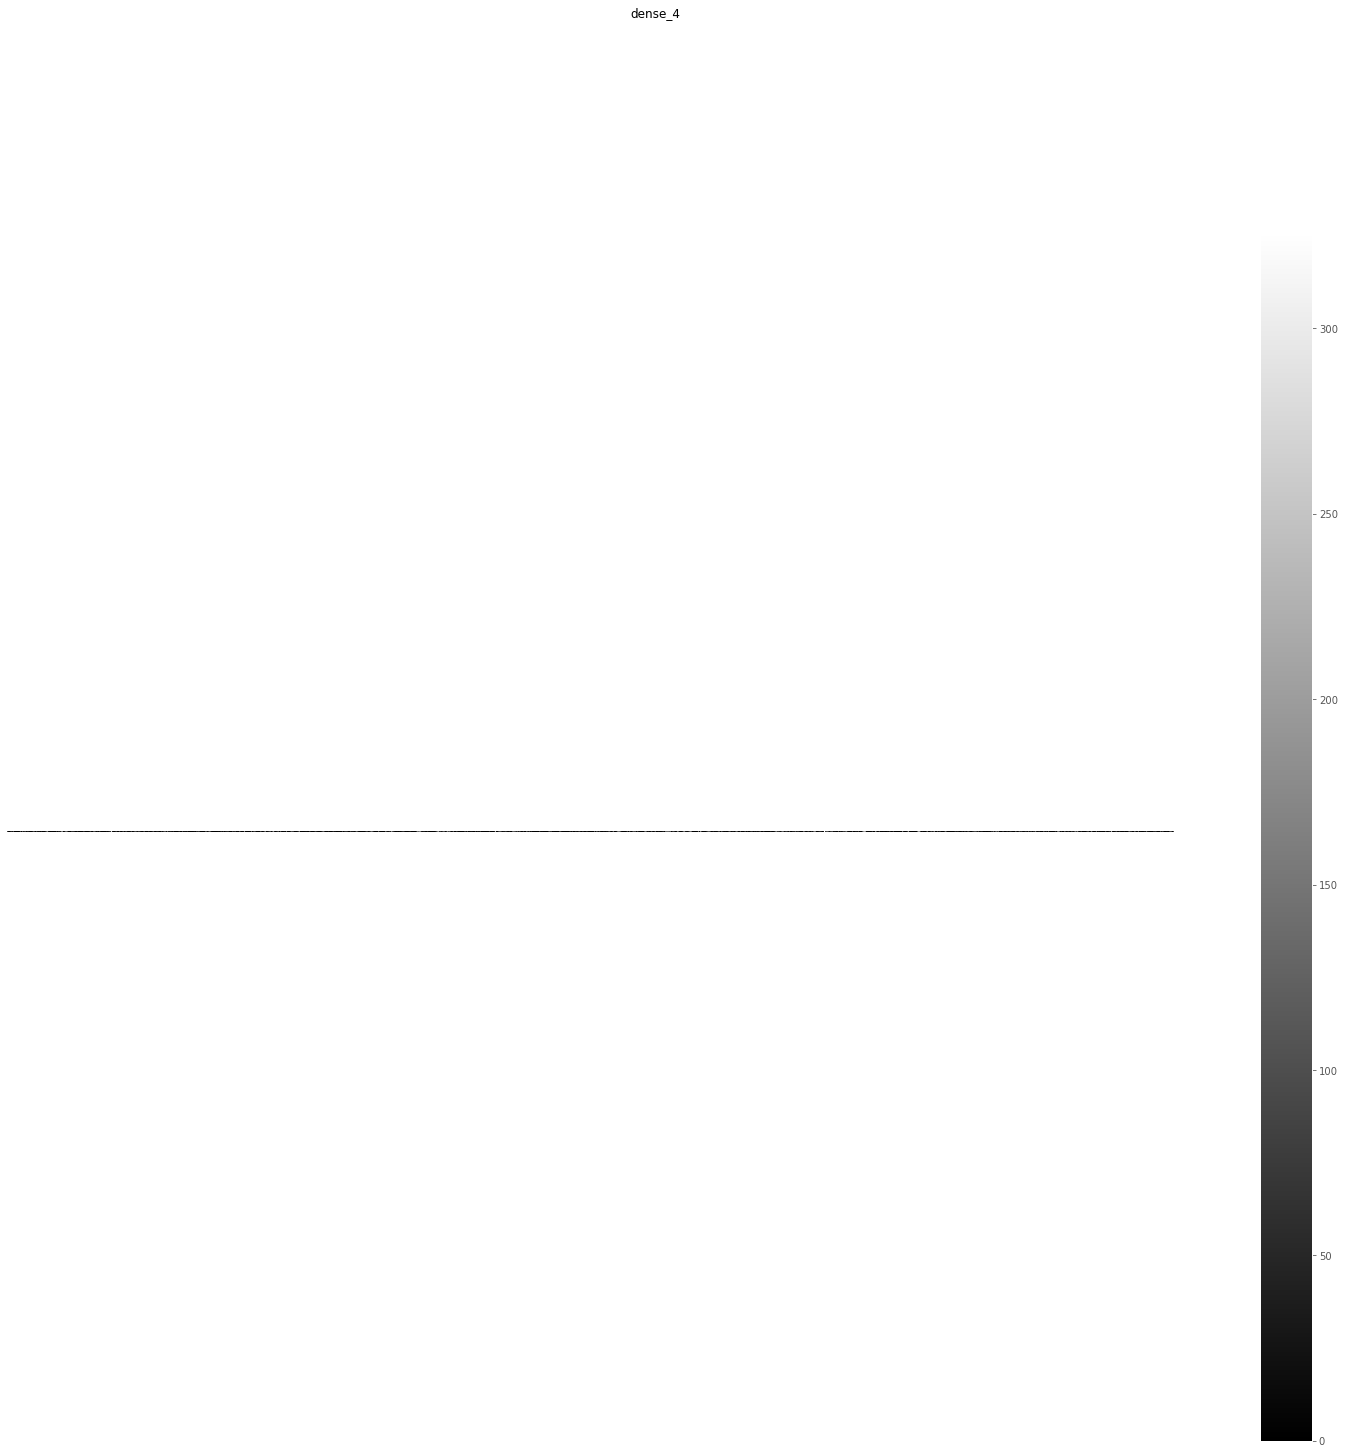

dropout_3 (1, 1000) 


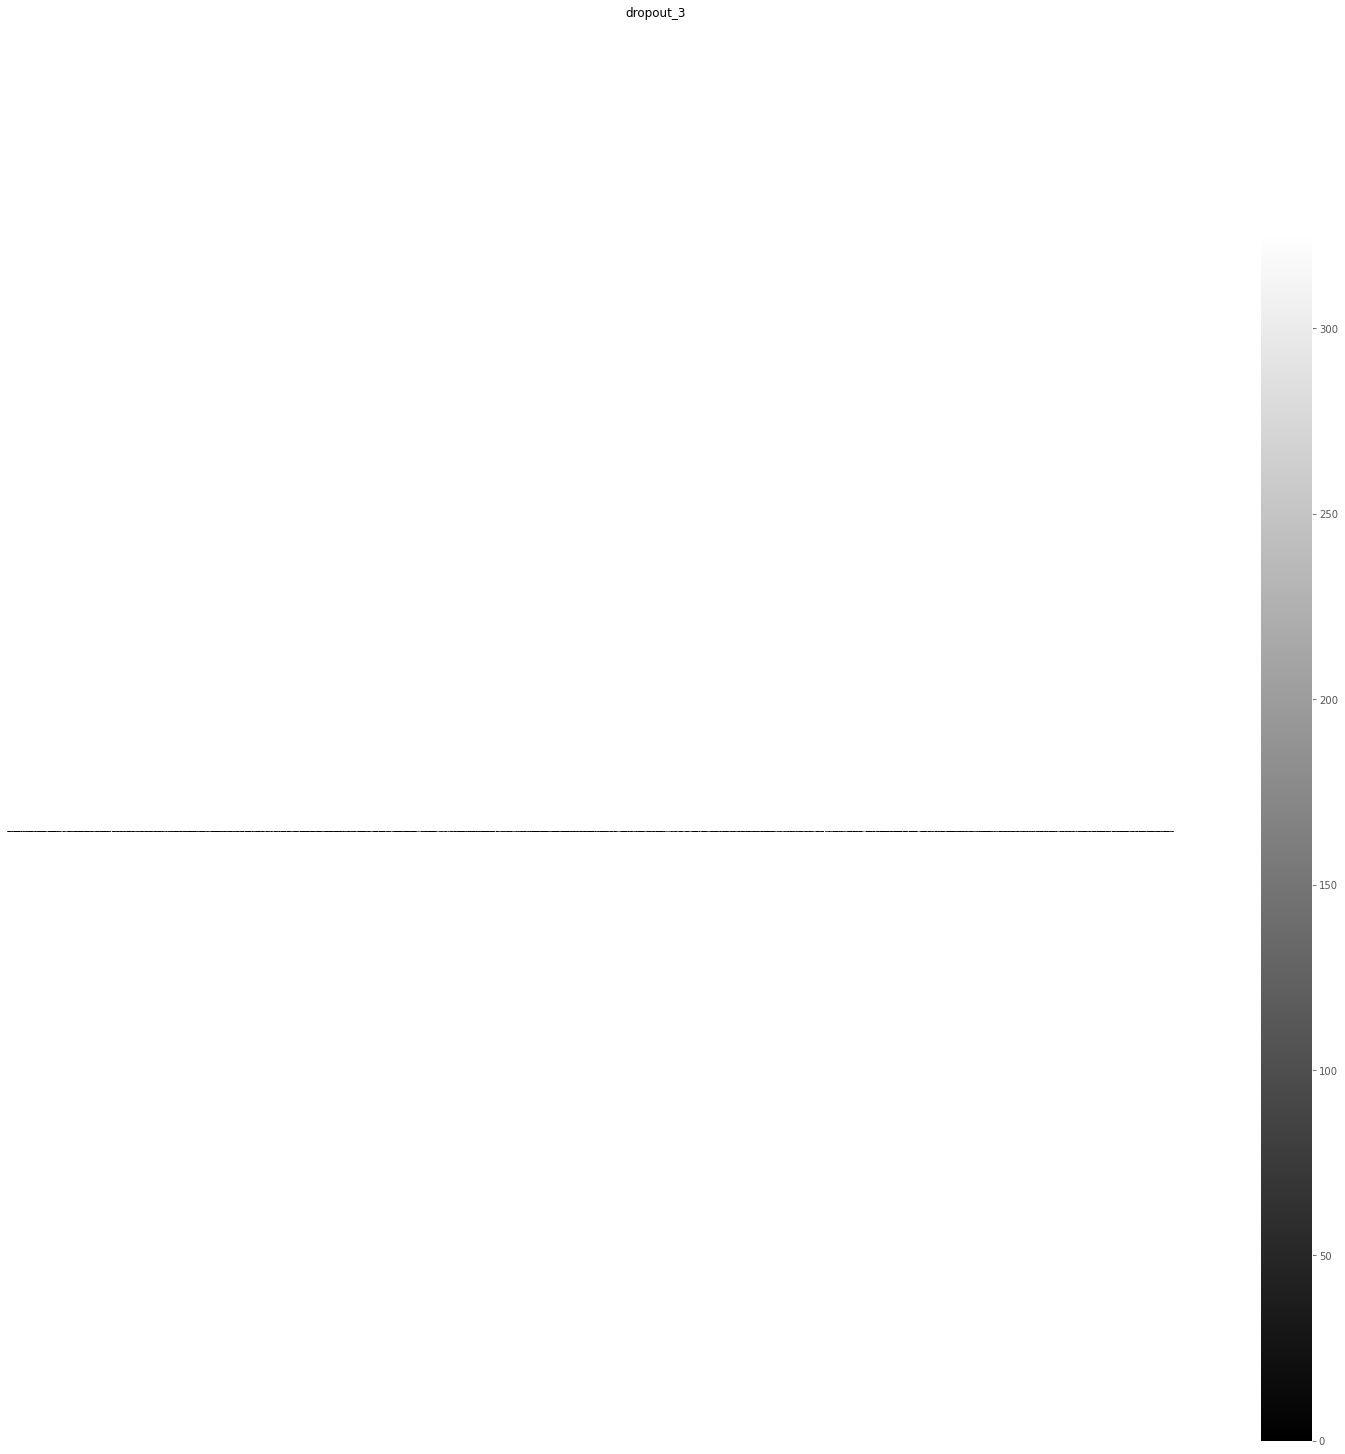

batch_normalization_13 (1, 1000) 


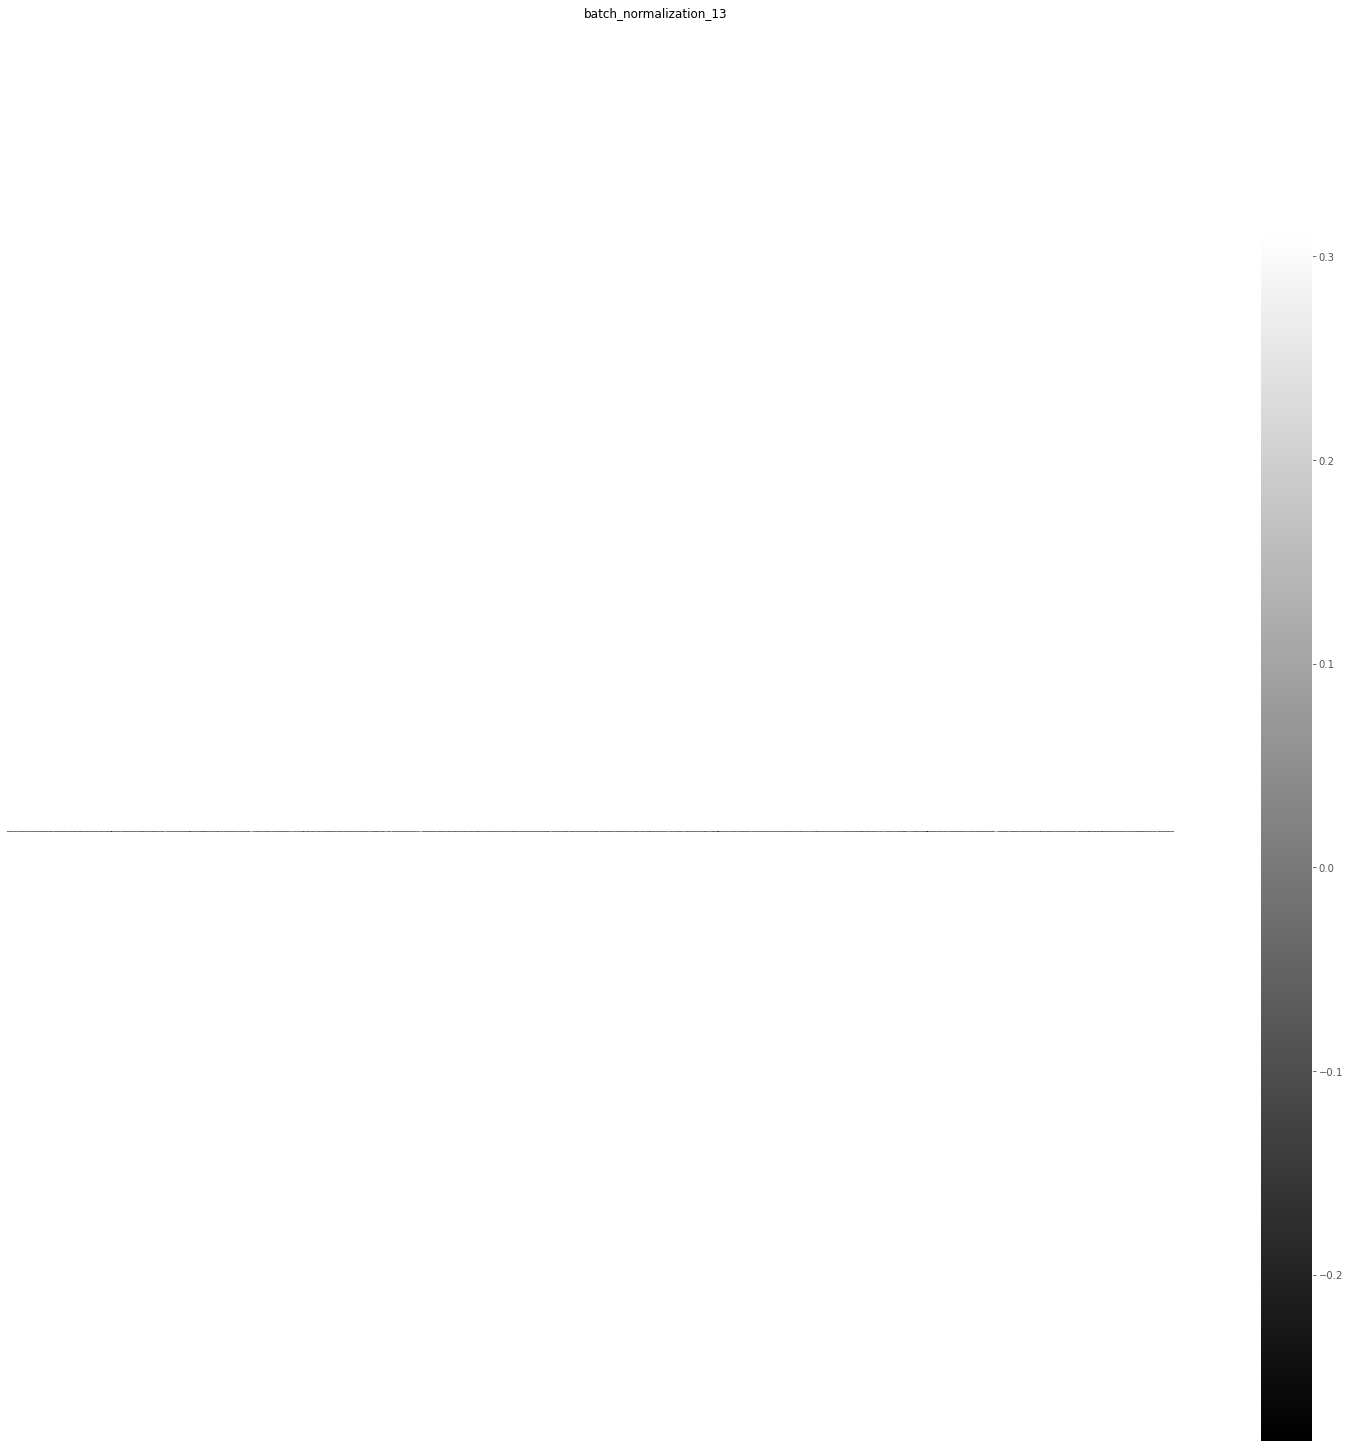

dense_5 (1, 11) 


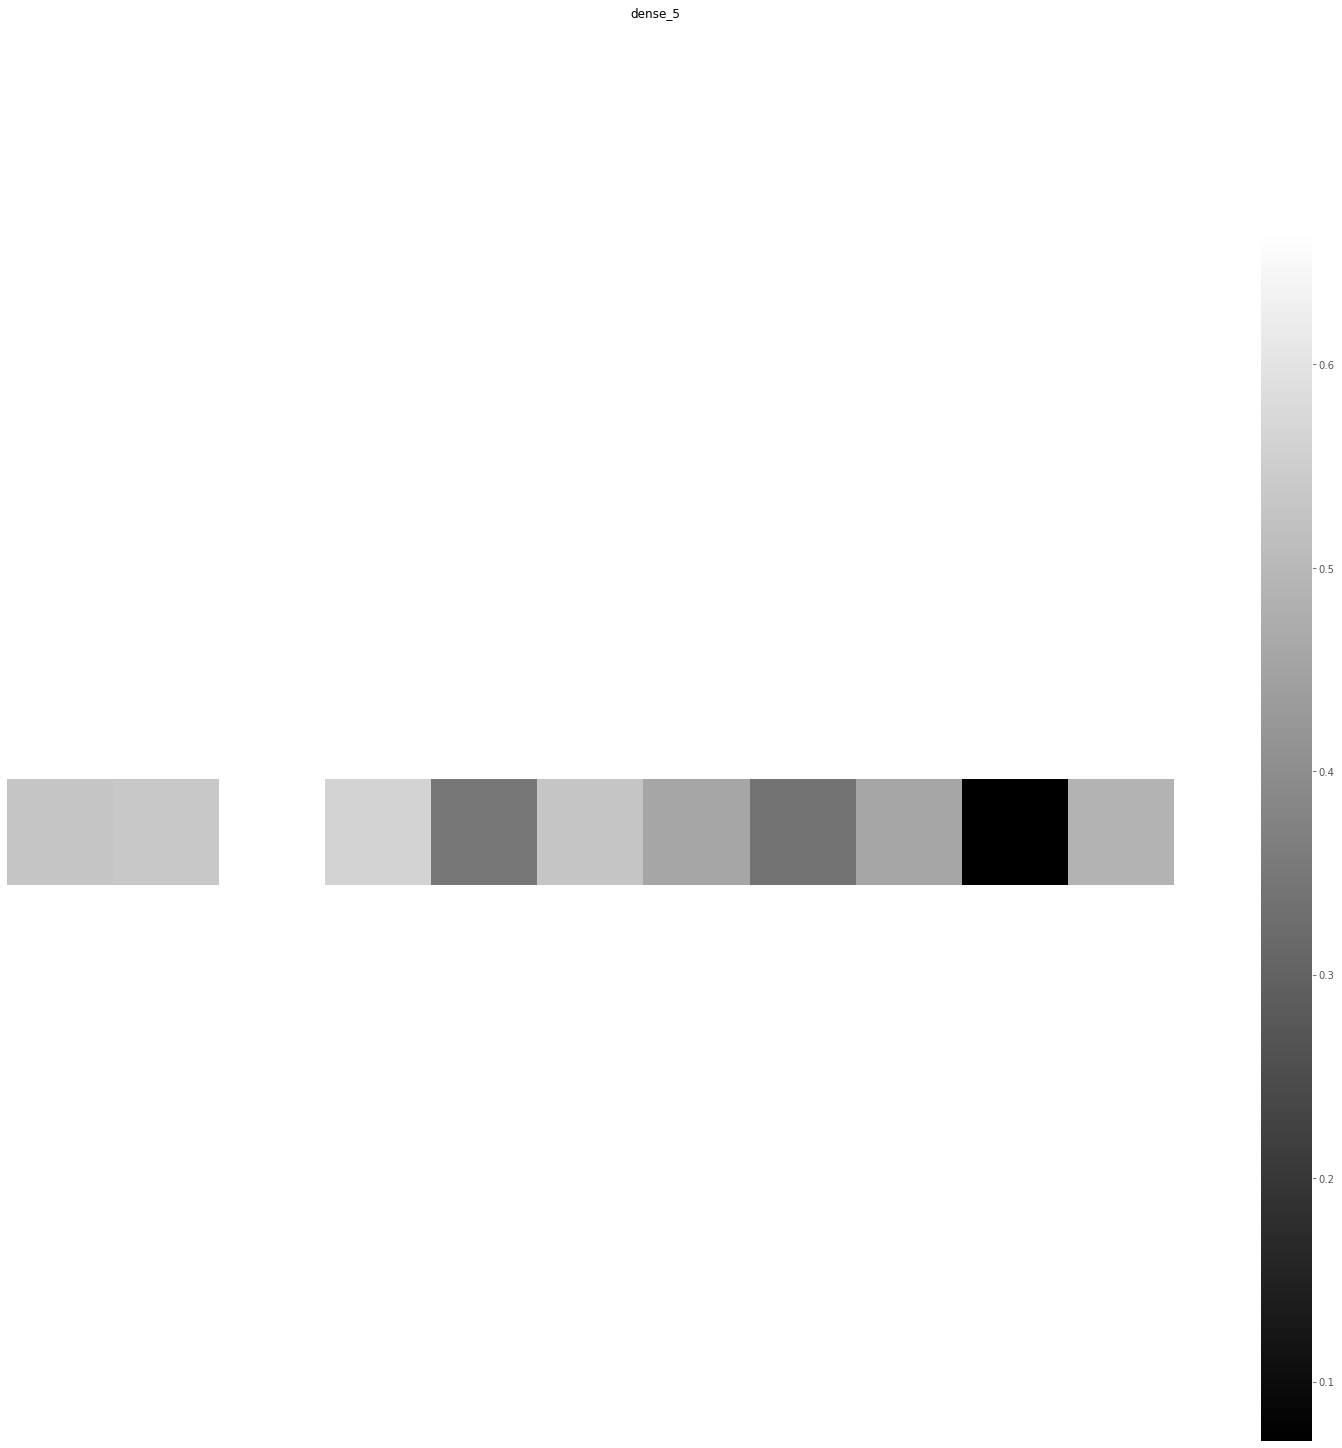

In [29]:
import keract
from keract import get_activations, display_activations

keract_inputs = test_gen_single.next()[0]
activations = get_activations(model, keract_inputs)
display_activations(activations, cmap="gray", save=False)

In [30]:
input_arr = keract_inputs
predictions = model.predict(input_arr)
prediction_word = predictions[0].tolist()

for x, y in enumerate(prediction_word):
    if y > .5:
        print(new_col_names[x])

for x, y in enumerate(prediction_word):
    print(new_col_names[x] + ' ' + str(y))
    
print(data_entries.loc[data_entries['path']==image_path])

Mass
Consolidation
Atelectasis
Pneumothorax
Emphysema
Mass 0.5287181735038757
Consolidation 0.5373497009277344
Atelectasis 0.6655040383338928
Pneumothorax 0.5640718340873718
Edema 0.3496096134185791
Emphysema 0.5290770530700684
Fibrosis 0.458153635263443
Effusion 0.33830177783966064
Pleural_Thickening 0.458049476146698
Cardiomegaly 0.07096665352582932
Hernia 0.4884214997291565
            Image Index    Finding Labels  Patient ID  \
85014  00020947_005.png  Mass|Atelectasis       20947   

                                                   path  Mass  Consolidation  \
85014  ../input/data/images_010/images/00020947_005.png   1.0            0.0   

       Atelectasis  Pneumothorax  Edema  Emphysema  Fibrosis  Effusion  \
85014          1.0           0.0    0.0        0.0       0.0       0.0   

       Pleural_Thickening  Cardiomegaly  Hernia  
85014                 0.0           0.0     0.0  


conv2d_5_input (1, 256, 256, 1) 


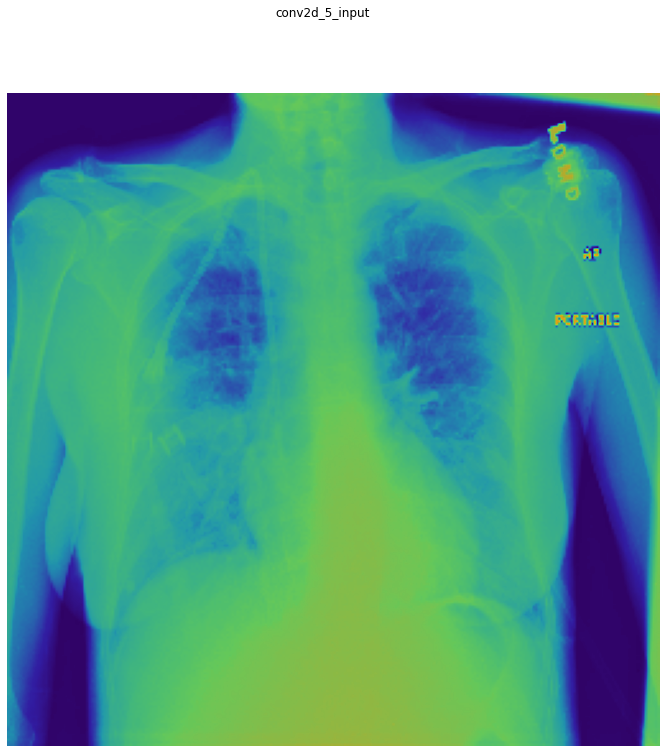

conv2d_5 (1, 62, 62, 96) 


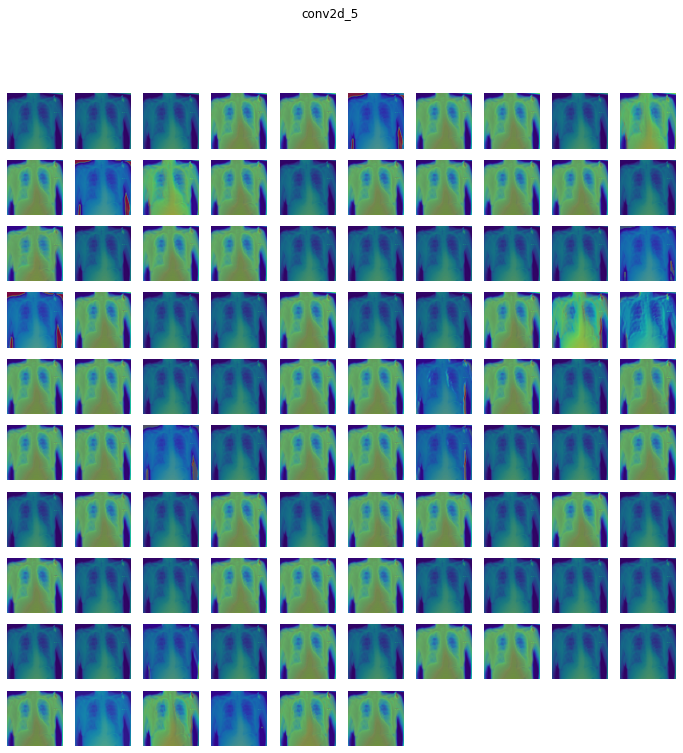

max_pooling2d_3 (1, 31, 31, 96) 


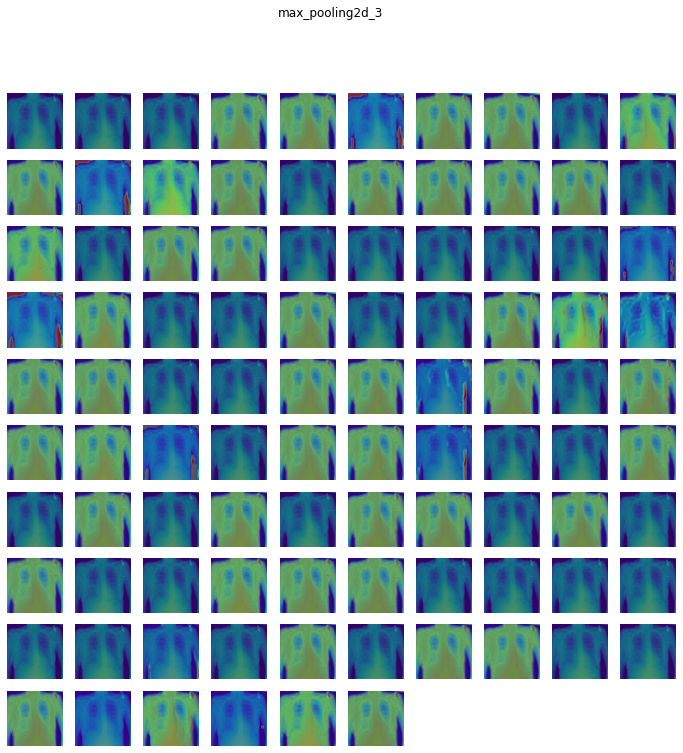

batch_normalization_7 (1, 31, 31, 96) 


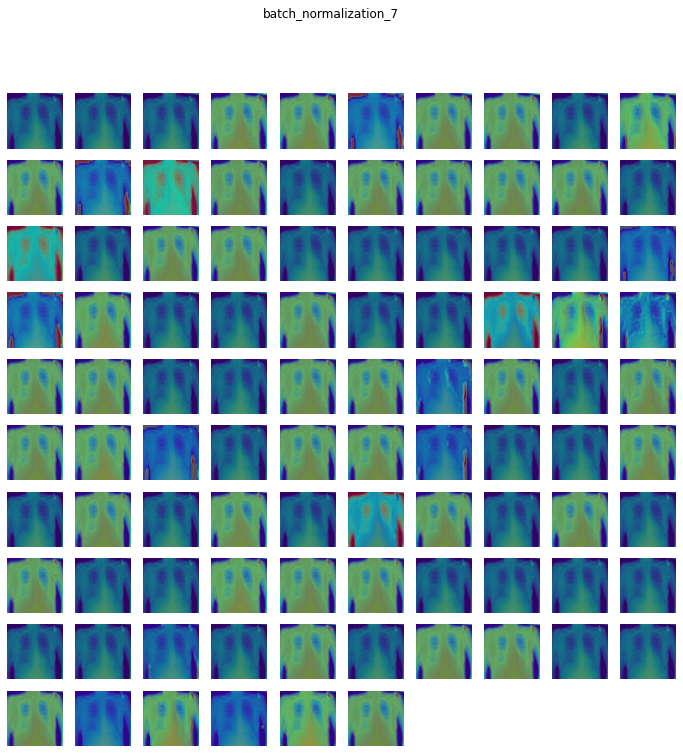

conv2d_6 (1, 21, 21, 256) 


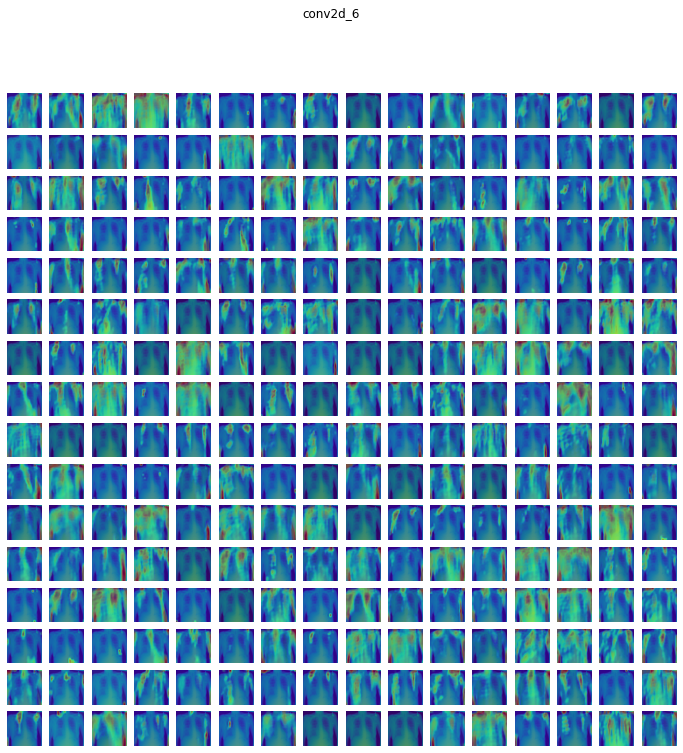

max_pooling2d_4 (1, 10, 10, 256) 


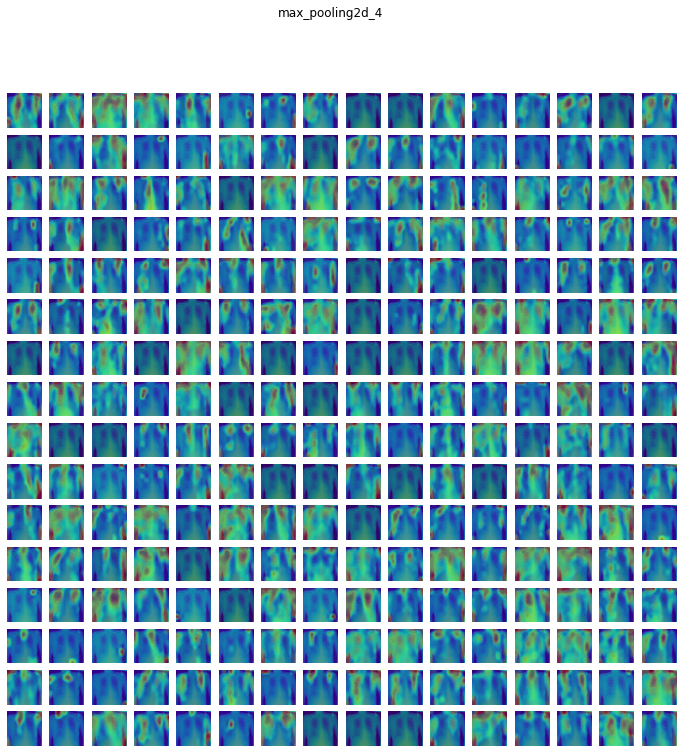

batch_normalization_8 (1, 10, 10, 256) 


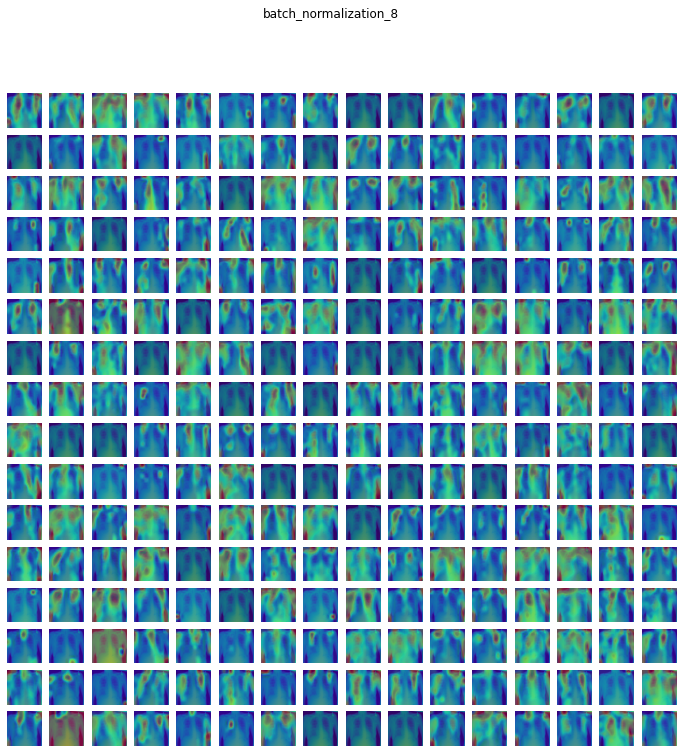

conv2d_7 (1, 8, 8, 384) 


In [ ]:
from keract import display_heatmaps
display_heatmaps(activations, keract_inputs, save=False)